<h1 style="font-size: 40px; 
    font-family:Garamond; 
    margin-bottom:2px;
    background-color: steelblue; 
    border-radius: 5px 5px; 
    padding: 5px;
    color: white; 
    text-align: center;">Credit Card Churn Prediction</h1>

What is Customer Churn?
Customer churn means a customer’s ending their relationship with a bank/company for any reason. Although churn is inevitable at a certain level, a high customer churn rate is a reason for failing to reach the business goals. So identifying customers who would churn is very important for business

<a href='#tb'></a>

<h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;"> Table of Contents</h2>
   
   
-  <a href='#ct'>Context </a>
-  <a href='#dd'>Data Dictionary </a>
-  <a href='#pr'>Problem </a>
-  <a href='#li'>Libraries </a>
-  <a href='#rd'>Read and Understand Data </a>
-  <a href='#dp'>Data Preprocessing</a>
-  <a href='#eda'>Exploratory Data Analysis </a>
-  <a href='#ins'>Insights based on EDA </a>
-  <a href='#ms'>Missing value Detection and Treatment </a>
-  <a href='#od'>Outlier Detection</a>
-  <a href='#Mb'>Model Building</a>
-  <a href='#ht'>HyperParameter Tuning</a>
-  <a href='#cn'>Conclusion </a>
-  <a href='#br'>Business Recommendations & Insights </a>



<a id='ct'></a>
<h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Context</h2>


The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

**Objective**
- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

 <a id='dd'>
 <div class=h2>Data Dictionary </div>

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


**What Is a Revolving Balance?**

If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance

**What is the Average Open to buy?**

'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

**What is the Average utilization Ratio?**

The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.

**Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:**

( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

<h2 style = "font-family:TimesNewRoman;color:black;font-weight:bold">Problem</h2> 

- Does Income has any effect on Attrition .?
- Does Sex has any relation on Attrition.?
- What are the signs of attrition .?



 <a id='li'></a>
 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Libraries</h2>

In [2]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score # Sklearn package's randomized data splitting function

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier
)

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# To impute missing values
from sklearn.impute import KNNImputer
# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth',200)
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')
# For pandas profiling
from pandas_profiling import ProfileReport
print('Load Libraries-Done')


Load Libraries-Done



<a id='rd'></a>
 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Read and Understand Data</h2>


In [3]:
#Reading the Excel file  used tourism.xlsx 
data_path='../input/bankcurners/BankChurners.csv'

df=pd.read_csv(data_path)


df_credit=df.copy()
print(f'There are {df_credit.shape[0]} rows and {df_credit.shape[1]} columns') # fstring 

There are 10127 rows and 21 columns


In [4]:
# View the first  5 rows of the dataset.
df_credit.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3   12691.00000                  777      11914.00000   
1                      2    8256.00000                  864       7392.00000   
2                      0    3418.00000                    0       3418.00000   
3                      1    3313.00000                 2517        796.00000   
4                      0    4716.00000                    0       4716.00000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0               1.33500             1144              42              1.62500   
1               1.54100             1291              33              3.71400   
2               2.59400             1887              20              2.33300   
3               1.40500             1171              20              2.33300   
4               2.17500              816              28              2.50000   

   Avg_Utilization_Ratio  
0                0.06100  
1                0.10500  
2                0.00000  
3                0.76000  
4                0.00000

In [5]:
# last 5 rows
df_credit.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3    4003.00000                 1851   
10123                      3    4277.00000                 2186   
10124                      4    5409.00000                    0   
10125                      3    5281.00000                    0   
10126                      4   10388.00000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122       2152.00000               0.70300            15476             117   
10123       2091.00000               0.80400             8764              69   
10124       5409.00000               0.81900            10291              60   
10125       5281.00000               0.53500             8395              62   
10126       8427.00000               0.70300            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122              0.85700                0.46200  
10123              0.68300                0.51100  
10124              0.81800                0.00000  
10125              0.72200                0.00000  
10126              0.64900                0.18900

In [6]:
#Understand the  dataset.
#get the size of dataframe
print ("Rows     : " , df_credit.shape[0])  #get number of rows/observations
print ("Columns  : " , df_credit.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df_credit.columns.tolist()) #get name of columns/features
missing_df = pd.DataFrame({
    "Missing": df_credit.isnull().sum(),
    "Missing %": round((df_credit.isnull().sum()/ df_credit.isna().count()*100), 2)
})
display(missing_df.sort_values(by='Missing', ascending=False))

Rows     :  10127
Columns  :  21
######################################## 
 Features : 

 ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Missing  Missing %
CLIENTNUM                       0    0.00000
Months_Inactive_12_mon          0    0.00000
Total_Ct_Chng_Q4_Q1             0    0.00000
Total_Trans_Ct                  0    0.00000
Total_Trans_Amt                 0    0.00000
Total_Amt_Chng_Q4_Q1            0    0.00000
Avg_Open_To_Buy                 0    0.00000
Total_Revolving_Bal             0    0.00000
Credit_Limit                    0    0.00000
Contacts_Count_12_mon           0    0.00000
Total_Relationship_Count        0    0.00000
Attrition_Flag                  0    0.00000
Months_on_book                  0    0.00000
Card_Category                   0    0.00000
Income_Category                 0    0.00000
Marital_Status                  0    0.00000
Education_Level                 0    0.00000
Dependent_count                 0    0.00000
Gender                          0    0.00000
Customer_Age                    0    0.00000
Avg_Utilization_Ratio           0    0.00000

In [7]:
#### Check the data types of the columns for the dataset.
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations**

- Customer_Age,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct, Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio, are all continous varaibles, rest are categorical variables
- Attrition_Flag is the Target variable.
- There are no missing values.

In [8]:
#### Summary of the dataset.
df_credit.describe().T

count            mean            std  \
CLIENTNUM                10127.00000 739177606.33366 36903783.45023   
Customer_Age             10127.00000        46.32596        8.01681   
Dependent_count          10127.00000         2.34620        1.29891   
Months_on_book           10127.00000        35.92841        7.98642   
Total_Relationship_Count 10127.00000         3.81258        1.55441   
Months_Inactive_12_mon   10127.00000         2.34117        1.01062   
Contacts_Count_12_mon    10127.00000         2.45532        1.10623   
Credit_Limit             10127.00000      8631.95370     9088.77665   
Total_Revolving_Bal      10127.00000      1162.81406      814.98734   
Avg_Open_To_Buy          10127.00000      7469.13964     9090.68532   
Total_Amt_Chng_Q4_Q1     10127.00000         0.75994        0.21921   
Total_Trans_Amt          10127.00000      4404.08630     3397.12925   
Total_Trans_Ct           10127.00000        64.85869       23.47257   
Total_Ct_Chng_Q4_Q1      10127.00000         0.71222        0.23809   
Avg_Utilization_Ratio    10127.00000         0.27489        0.27569   

                                     min             25%             50%  \
CLIENTNUM                708082083.00000 713036770.50000 717926358.00000   
Customer_Age                    26.00000        41.00000        46.00000   
Dependent_count                  0.00000         1.00000         2.00000   
Months_on_book                  13.00000        31.00000        36.00000   
Total_Relationship_Count         1.00000         3.00000         4.00000   
Months_Inactive_12_mon           0.00000         2.00000         2.00000   
Contacts_Count_12_mon            0.00000         2.00000         2.00000   
Credit_Limit                  1438.30000      2555.00000      4549.00000   
Total_Revolving_Bal              0.00000       359.00000      1276.00000   
Avg_Open_To_Buy                  3.00000      1324.50000      3474.00000   
Total_Amt_Chng_Q4_Q1             0.00000         0.63100         0.73600   
Total_Trans_Amt                510.00000      2155.50000      3899.00000   
Total_Trans_Ct                  10.00000        45.00000        67.00000   
Total_Ct_Chng_Q4_Q1              0.00000         0.58200         0.70200   
Avg_Utilization_Ratio            0.00000         0.02300         0.17600   

                                     75%             max  
CLIENTNUM                773143533.00000 828343083.00000  
Customer_Age                    52.00000        73.00000  
Dependent_count                  3.00000         5.00000  
Months_on_book                  40.00000        56.00000  
Total_Relationship_Count         5.00000         6.00000  
Months_Inactive_12_mon           3.00000         6.00000  
Contacts_Count_12_mon            3.00000         6.00000  
Credit_Limit                 11067.50000     34516.00000  
Total_Revolving_Bal           1784.00000      2517.00000  
Avg_Open_To_Buy               9859.00000     34516.00000  
Total_Amt_Chng_Q4_Q1             0.85900         3.39700  
Total_Trans_Amt               4741.00000     18484.00000  
Total_Trans_Ct                  81.00000       139.00000  
Total_Ct_Chng_Q4_Q1              0.81800         3.71400  
Avg_Utilization_Ratio            0.50300         0.99900

**Observations**
- Average customer age is ~46 and max customer age is 73.
- Average period of relationship with the bank is ~35 months with minimum of 13 and max as 56.
- Maximum Total number of product  held by customer is 6 and on average is ~4.
- Mean Credit_limit 8631 while median is 4549 , indicates data has outliers and right skewed.
- Total_Revolving_Bal has mean as 1162.
- Avg_Open_To_Buy has mean 7469 and max as 34516 .This number had appeared before in credit limit. This seems to be some default value. Distrubution is right skewed with some outliers on higher end.
- Total_Amt_Chng_Q4_Q1 median is 0.73600 and mean is 0.75994.
- Total_Trans_Amt has an average of 4404 and median of 3899. This indicate data is right skewed with outliers on higher end 
- Total_Trans_Ct has an average value of 64.8 and median of 67. This ndicates slight skewness to the right.
- Total_Ct_Chng_Q4_Q1 has an average of 0.71 and median value of 0.702.
- Avg_Utilization_Ratio is right skewed with an average of 0.27 and median at 0.176.



<a id='dp'></a>

 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Data Preprocessing</h2>



In [9]:
#### Droping CLIENTNUM
df_credit.drop(['CLIENTNUM'],axis=1,inplace=True)

In [10]:

cat_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']


In [11]:

for col in cat_cols:
    print(f"Feature: {col}")
    print("-"*40)
    display(pd.DataFrame({"Counts": df_credit[col].value_counts(dropna=False)}).sort_values(by='Counts', ascending=False))

Feature: Attrition_Flag
----------------------------------------


Counts
Existing Customer    8500
Attrited Customer    1627

Feature: Gender
----------------------------------------


Counts
F    5358
M    4769

Feature: Education_Level
----------------------------------------


Counts
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451

Feature: Marital_Status
----------------------------------------


Counts
Married     4687
Single      3943
Unknown      749
Divorced     748

Feature: Income_Category
----------------------------------------


Counts
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727

Feature: Card_Category
----------------------------------------


Counts
Blue        9436
Silver       555
Gold         116
Platinum      20

Feature: Dependent_count
----------------------------------------


Counts
3    2732
2    2655
1    1838
4    1574
0     904
5     424

Feature: Total_Relationship_Count
----------------------------------------


Counts
3    2305
4    1912
5    1891
6    1866
2    1243
1     910

Feature: Months_Inactive_12_mon
----------------------------------------


Counts
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29

Feature: Contacts_Count_12_mon
----------------------------------------


Counts
3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54

**Observations**
- 1657 customers has attrited.
-  Education level,Income,martial status has `Unknown` category , this will have to be treated as missing value and will have to be imputed.
- Blue card has maxiumum customers.

In [12]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Attrition_Flag','Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

df_credit[cat_cols] = df_credit[cat_cols].astype('category')
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [13]:
df_credit.describe(include=['category']).T

count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level           10127      7           Graduate  3128
Marital_Status            10127      4            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380

#### Age

Age can be a vital factor in tourism, converting ages to bin to explore if there is any pattern

In [14]:
df_credit.Customer_Age.describe()

count   10127.00000
mean       46.32596
std         8.01681
min        26.00000
25%        41.00000
50%        46.00000
75%        52.00000
max        73.00000
Name: Customer_Age, dtype: float64

In [15]:
df_credit['Agebin'] = pd.cut(df_credit['Customer_Age'], bins = [25, 35,45,55,65, 75], labels = ['25-35', '36-45', '46-55', '56-65','66-75'])

In [16]:
df_credit.Agebin.value_counts()

46-55    4135
36-45    3742
56-65    1321
25-35     919
66-75      10
Name: Agebin, dtype: int64

 <a id='eda'> </a>
 
 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Exploratory Data Analysis</h2>


In [17]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="tan",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='red',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median})
                    

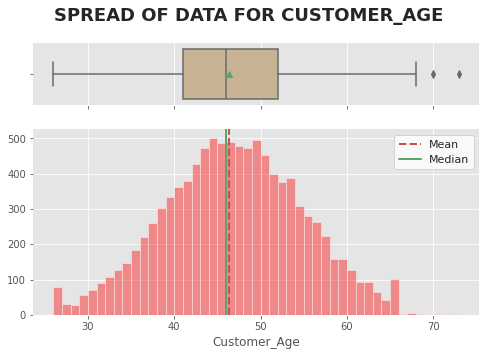

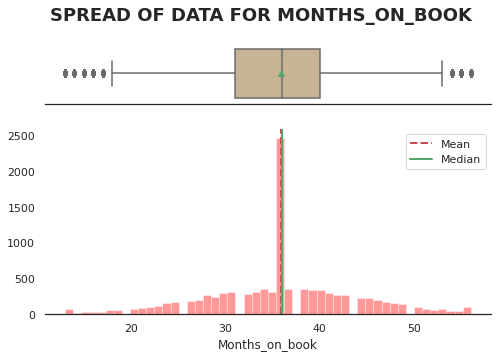

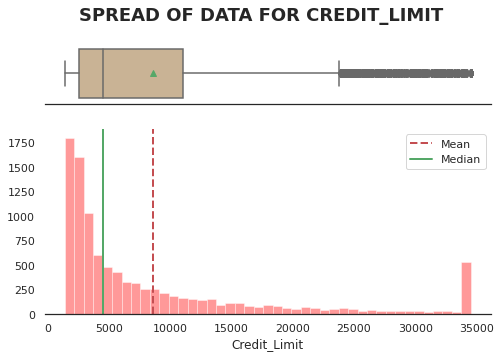

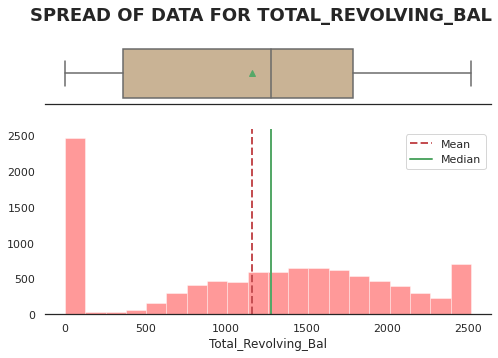

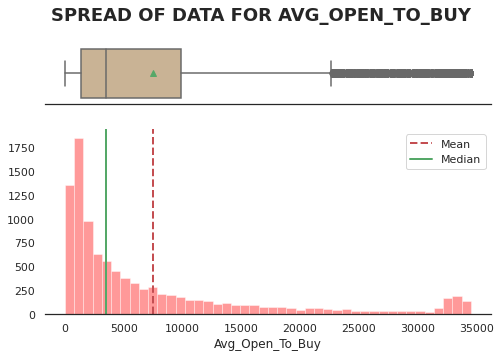

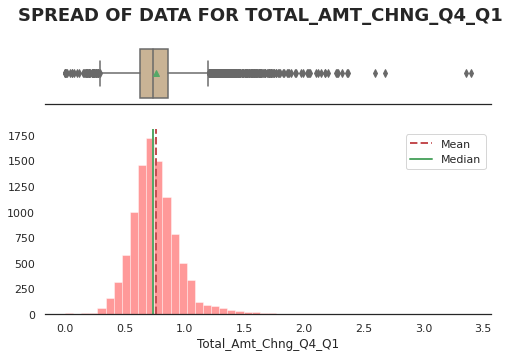

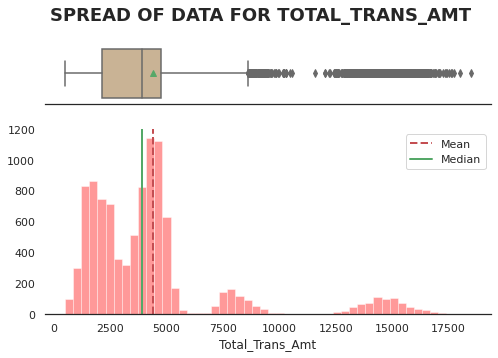

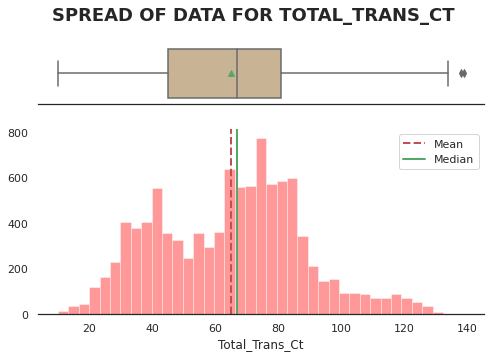

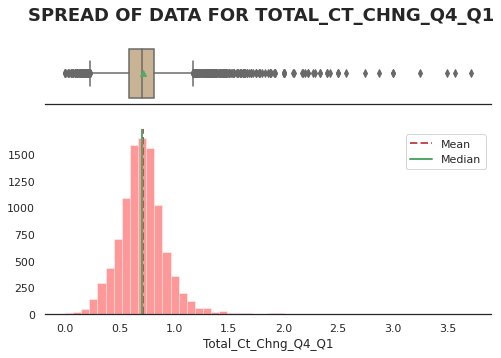

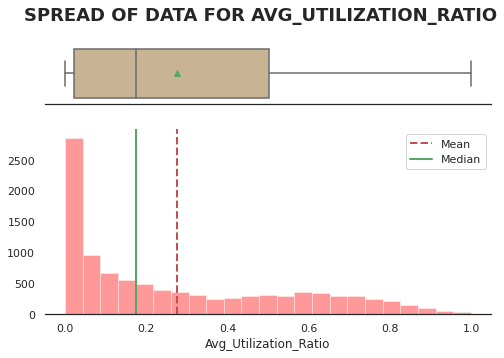

In [18]:
#select all quantitative columns for checking the spread
list_col=  df_credit.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df_credit[list_col[i]])

**Observations**
-  Customer Age is almost Normally disturbuted, with some outlier on higher end.
- Month on book has maximum distrubution around ~35-36.Most customer have credit card for this long. It has many outliers on lower and higher end.
- Credit card limit is right skewed , with a sudden pick at 35000, as seen before this is maxiumum limit and seems to be some kind of default value.There are lot of outliers on higher end. Customers above 25000 need to beinvestigated further.
- Total Revolving bal seems to have different  disturbution with many customers with ~0 revolving balance and then it follows almost normal distrubution and then  sudden peak at 2500.
- Average open to buy has same distribution as Credit card limit.
- Total Amt change  has lot of outliers on lower and upper end. There are some 3.5 ratio of  total amount change from Q4 to Q1,this  customers which needs to be investigated further.
- Total trans amt also has very different distrubution  with data between 0 -2500 , then 2500-5000, and then 750-10000 and then 12500-17500. It has lot of outliers on higher end.
- Total_trans_ct also has 3 modal with outliers on higher end.
- Total ct change q4_q1 has normal like disturbtion with lot of outliers on higher and lower end.
-  Avg_utlization ration is measure of  how much of the given credit limit is the customer actually using. it ranges from 0.0 to 1


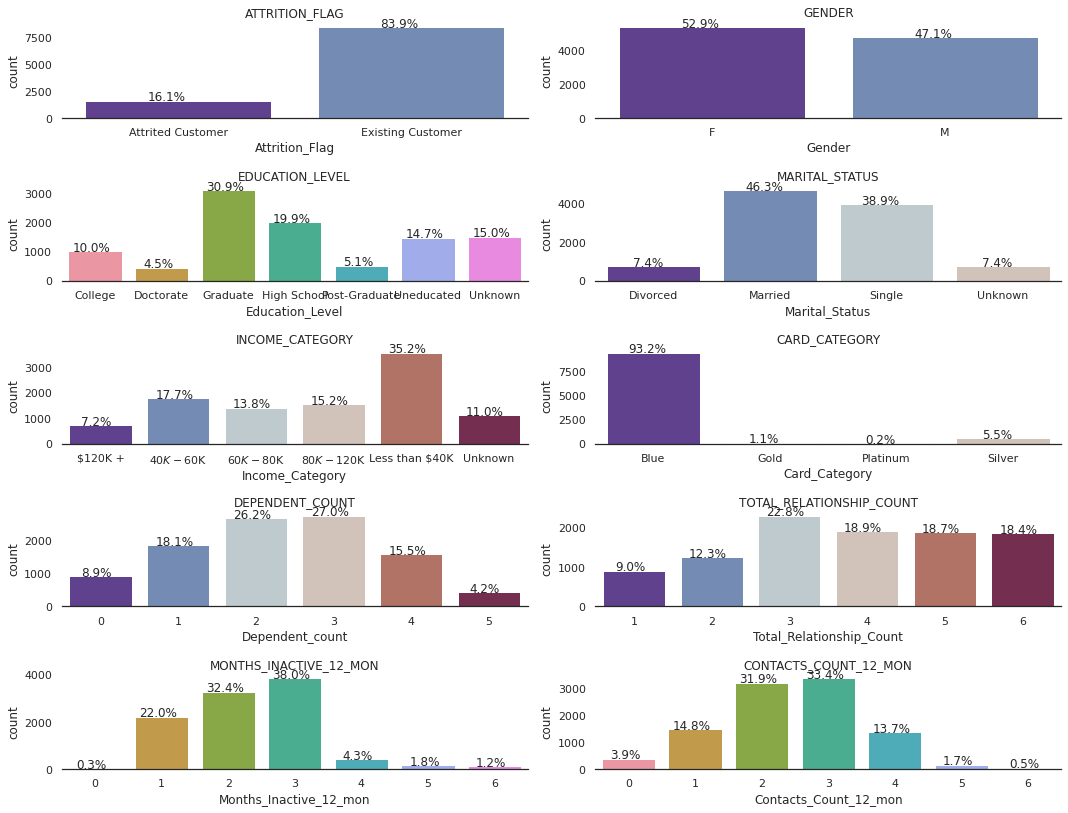

In [19]:
# Making a list of all categorical variables

plt.figure(figsize=(15,20))

sns.set_theme(style="white") 
for i, variable in enumerate(cat_cols):
                     plt.subplot(9,2,i+1)
                     order = df_credit[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('twilight_shifted')
                     ax=sns.countplot(x=df_credit[variable], data=df_credit )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_credit[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cat_cols[i].upper())
                                     


**Observations**
- ~16% of credit card customers attrited.
-  ~ 52 % are female customers who have credit cards.
- ~ 30 % customers are graduate. There are very few post graduate and doctorate customers.
- ~46 % are married customers. 7.4 % unknown status needs to be imputed.
- ~ 35% earn less than 40 k.
- ~ 93 % have blue card. Very less customers have a plantinum card.
- ~22 % have more than 3 bank products 
- ~38 % are inactive from 3 months. Customers who are inactive from 4,5,6 month should be investigated more to see if there is any relationship with attrition
- ~60 % for contacted 2-3 times in 12 month.

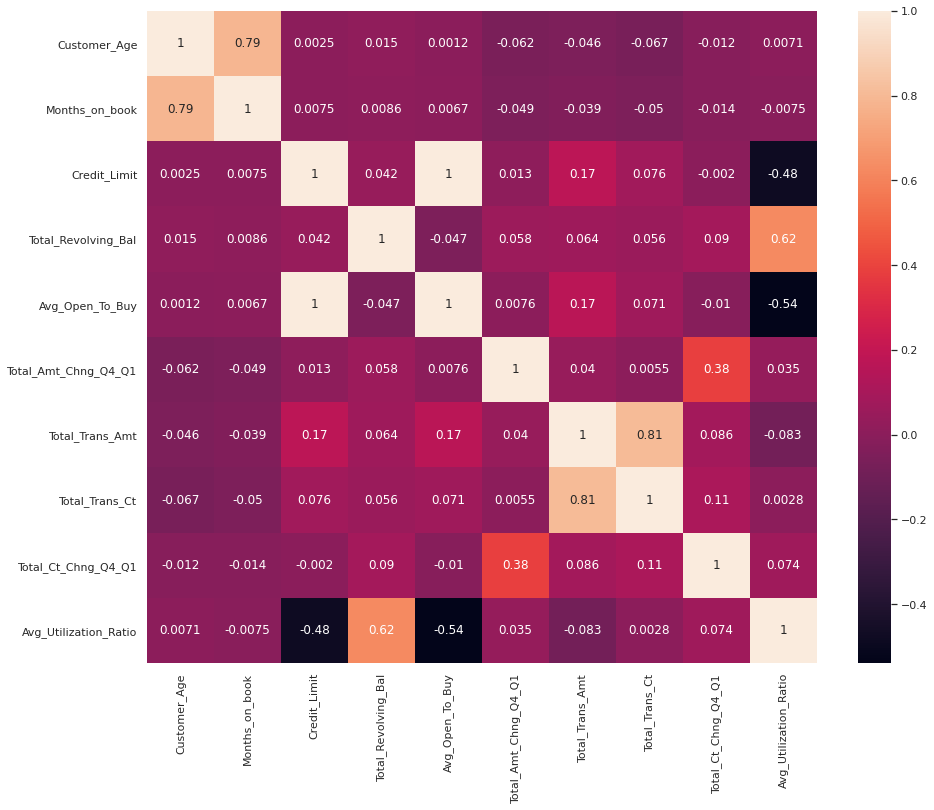

In [20]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,12))
sns.heatmap(df_credit.corr(),annot=True)
plt.show()

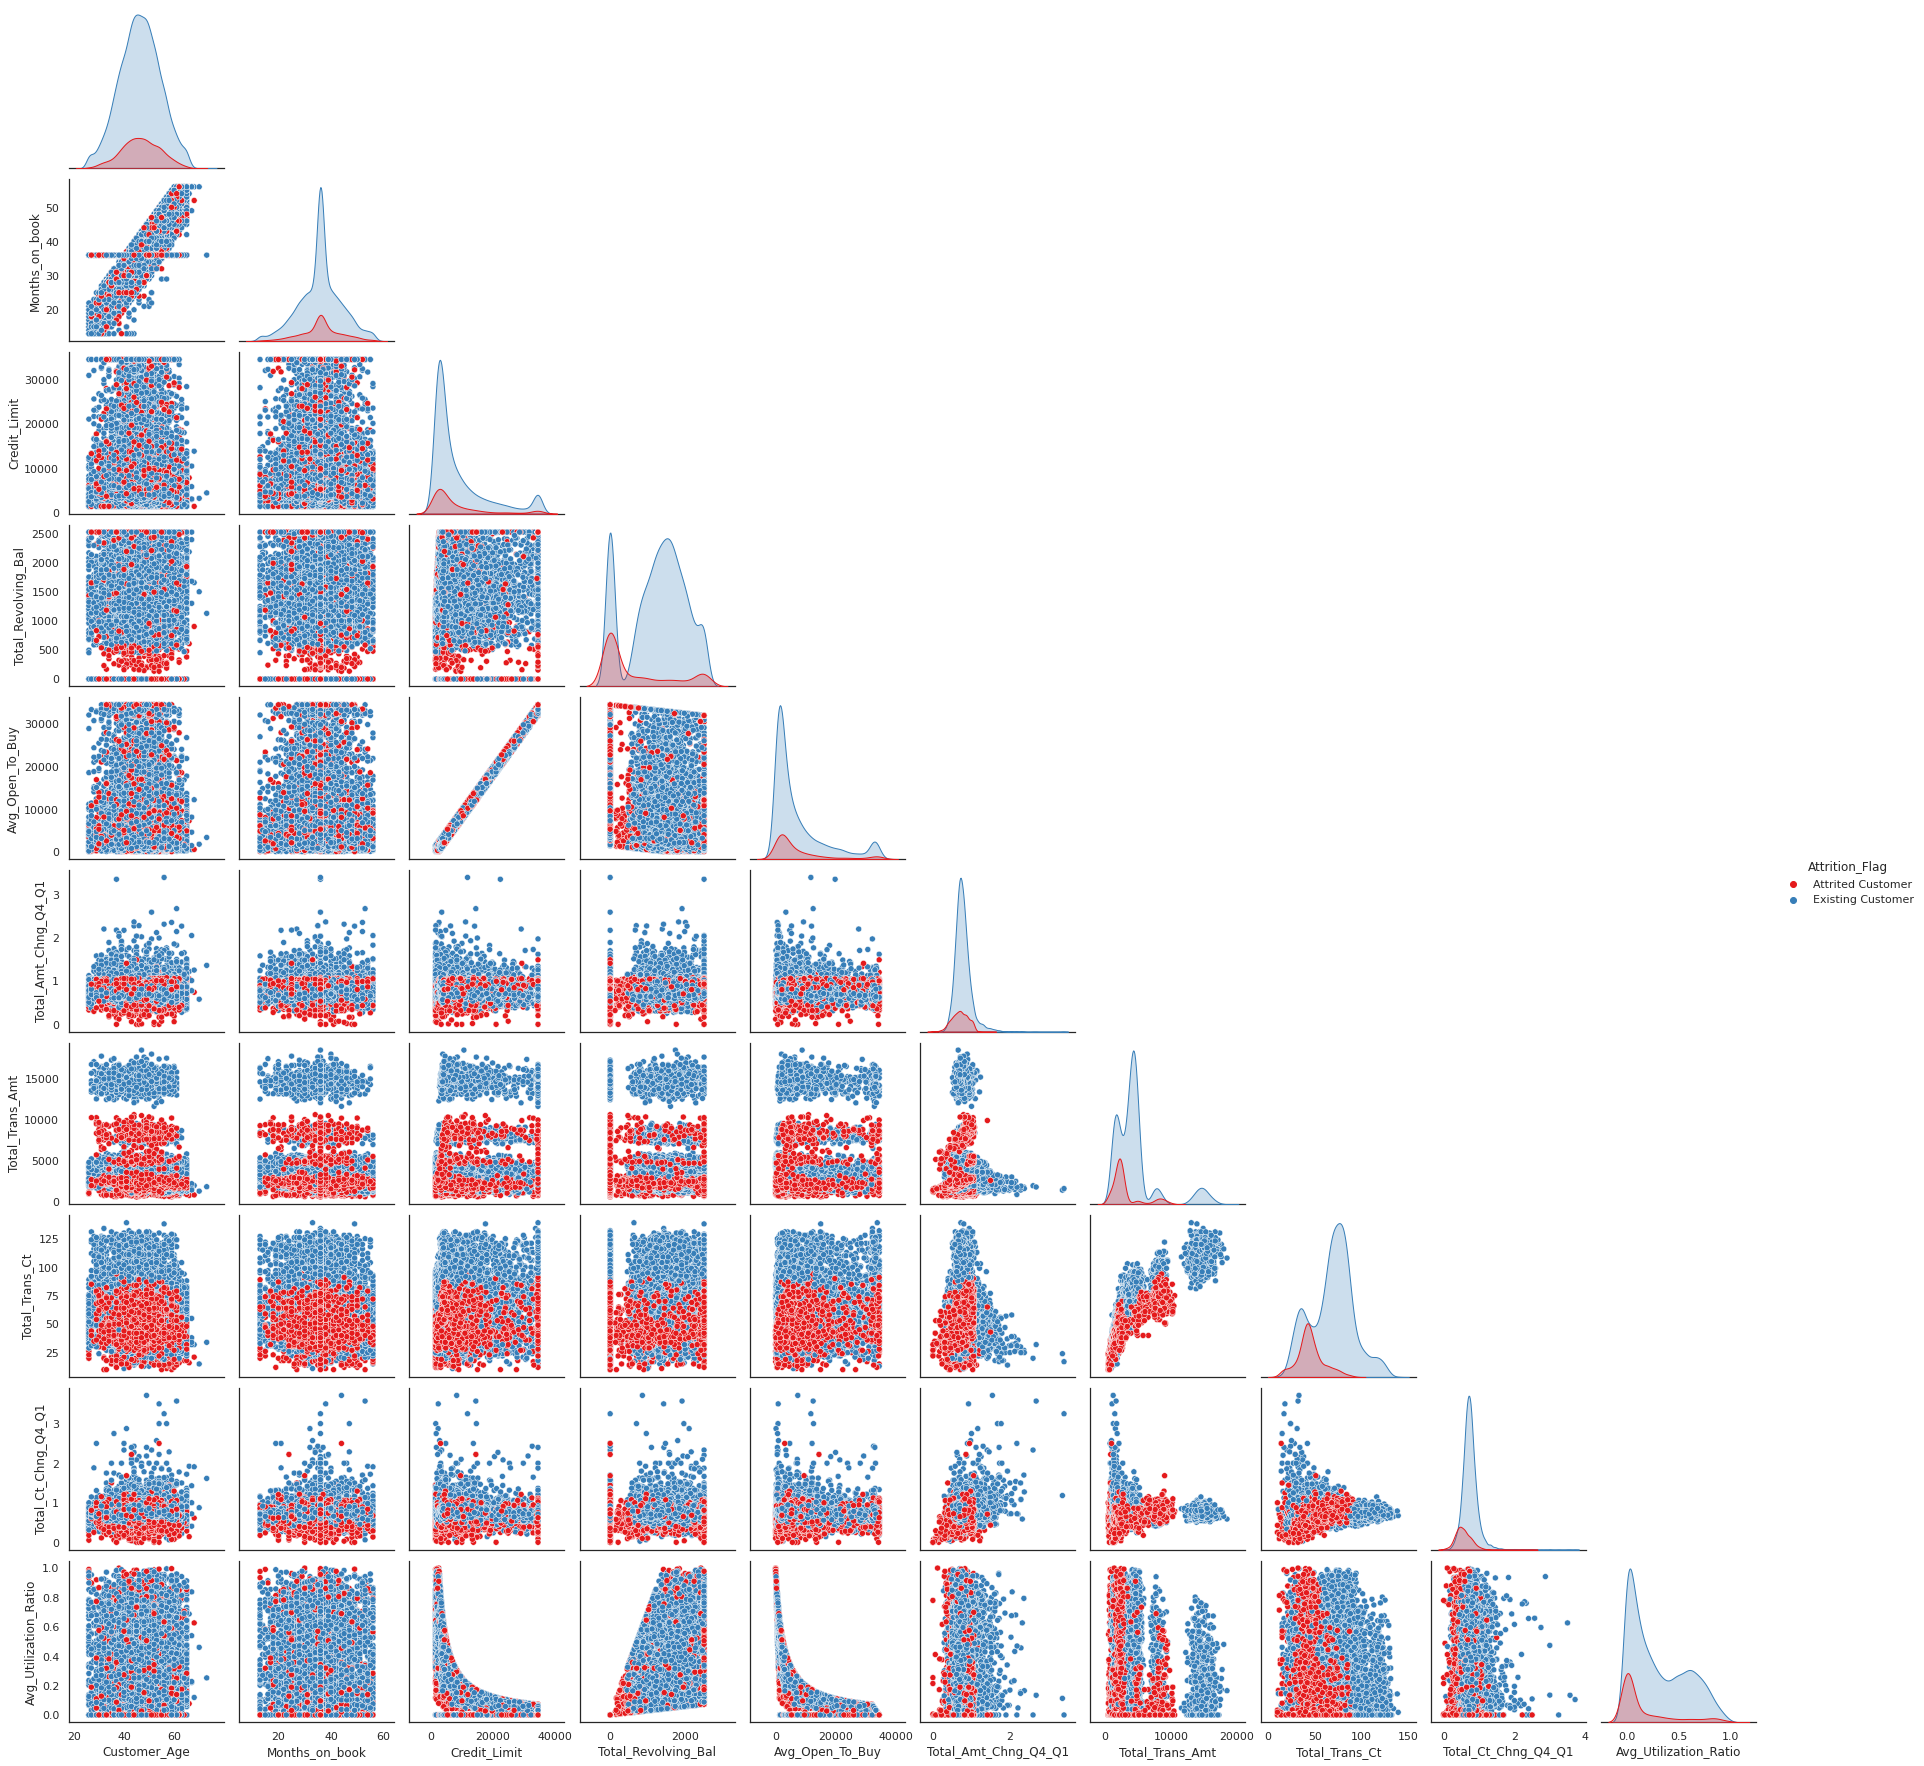

In [21]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df_credit, hue="Attrition_Flag",corner=True)
plt.show()

**Observations**
- Customer age and number of books are highly correlated.
- credit limit and Avg utlization ration has some negative correlation.
- Total revolving balance and average utlization are positively correlated.
- Average opening balance is negatively correlated to avg utlization ratio.
- There is very little correlation between total transfer amount and credit limit
- As expected there is very high correlation total transfer amount and total transfer count.
- Credit limit and Average open to buy is fully correlated, we can drop one of them.
- It is also logical that Total_Trans_Amt  is correlated  to Total_Amt_Chng_Q4_Q1,total ct_change_q4_Q1 . These features seems to be derived from Total_Trans_Amt. May be we can drop one of these columns.

In [22]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a existing customer',fontsize=12,fontweight='bold')
    sns.distplot(df_credit[(df_credit[target] == 'Existing Customer')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a  attrited customer ",fontsize=12,fontweight='bold')
    sns.distplot(df_credit[(df_credit[target] == 'Attrited Customer')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t attrited customer',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(df_credit[target],df_credit[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Attrited customer - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df_credit[target],df_credit[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

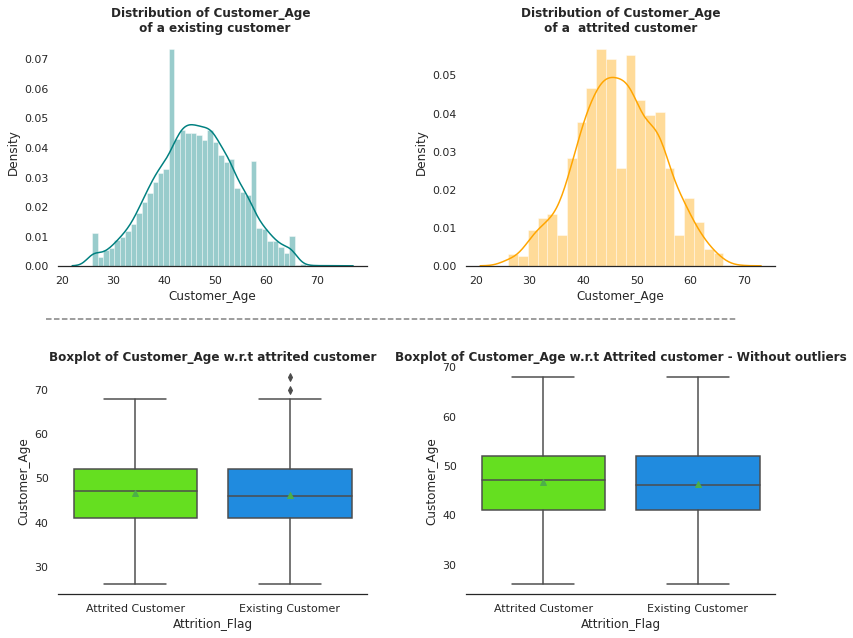

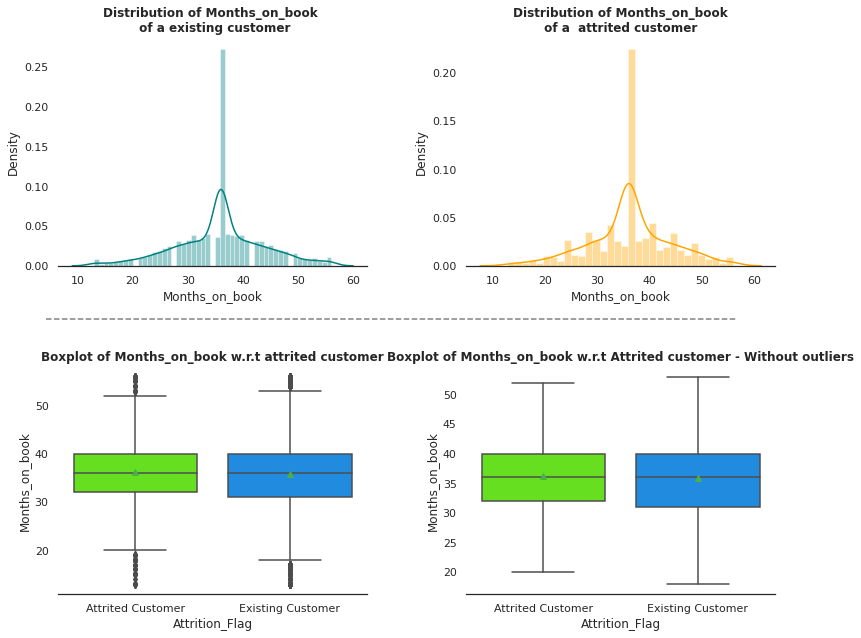

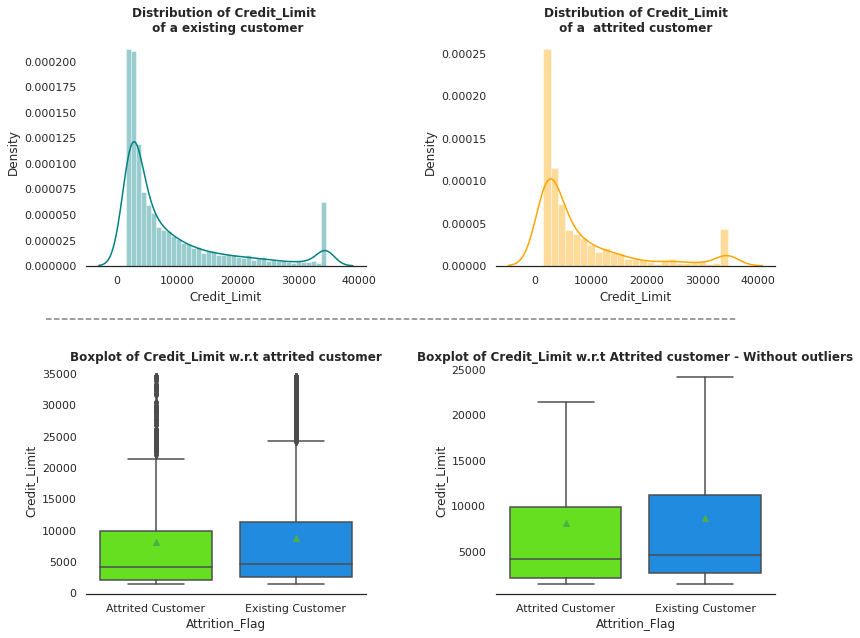

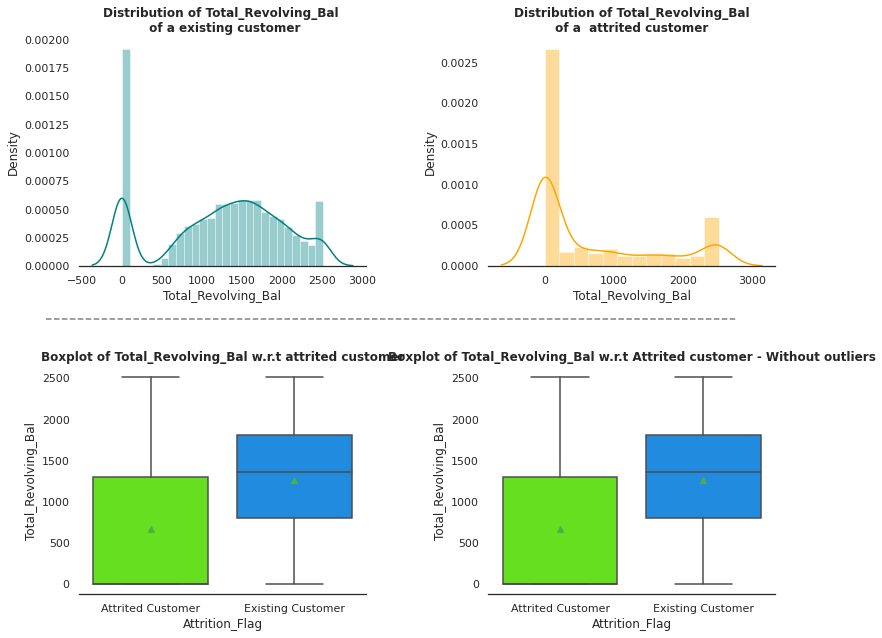

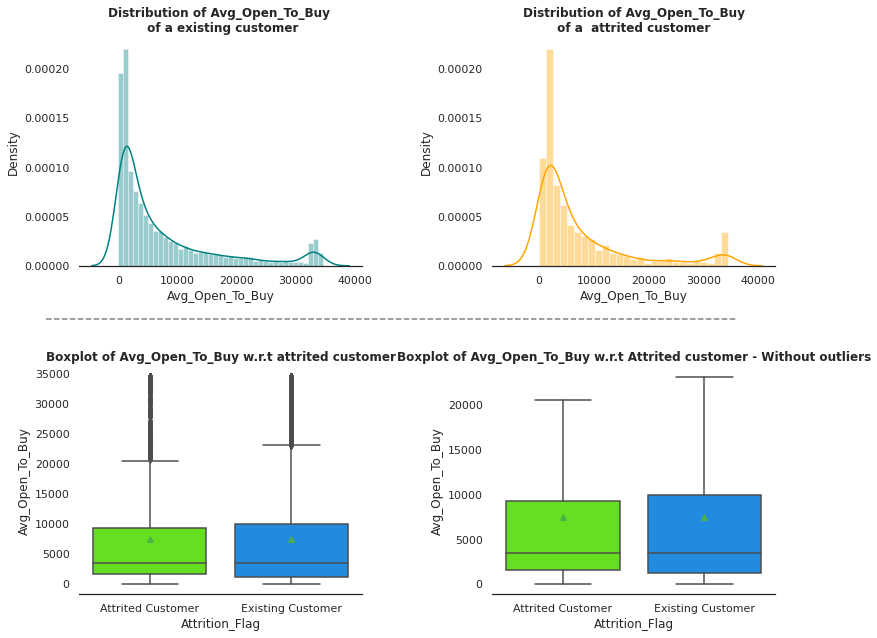

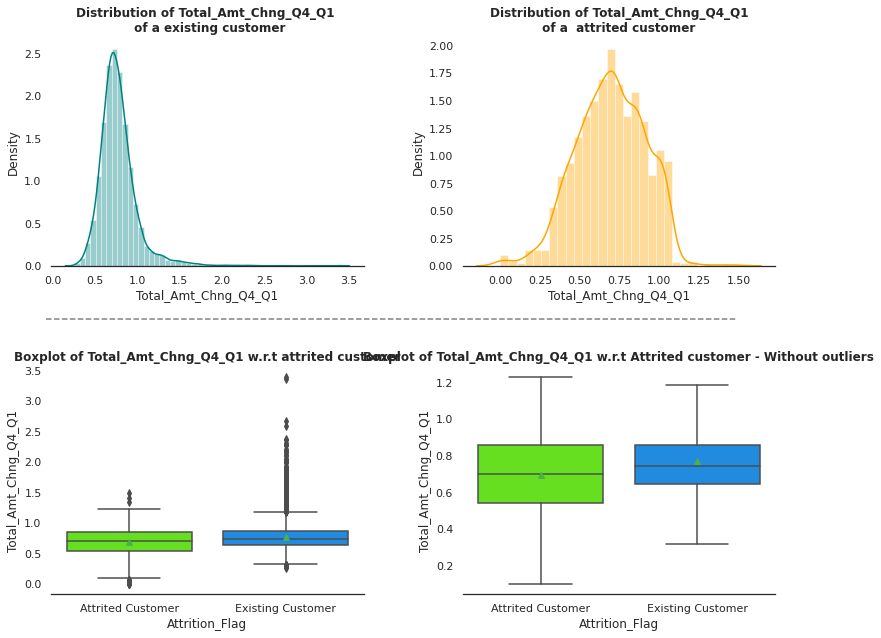

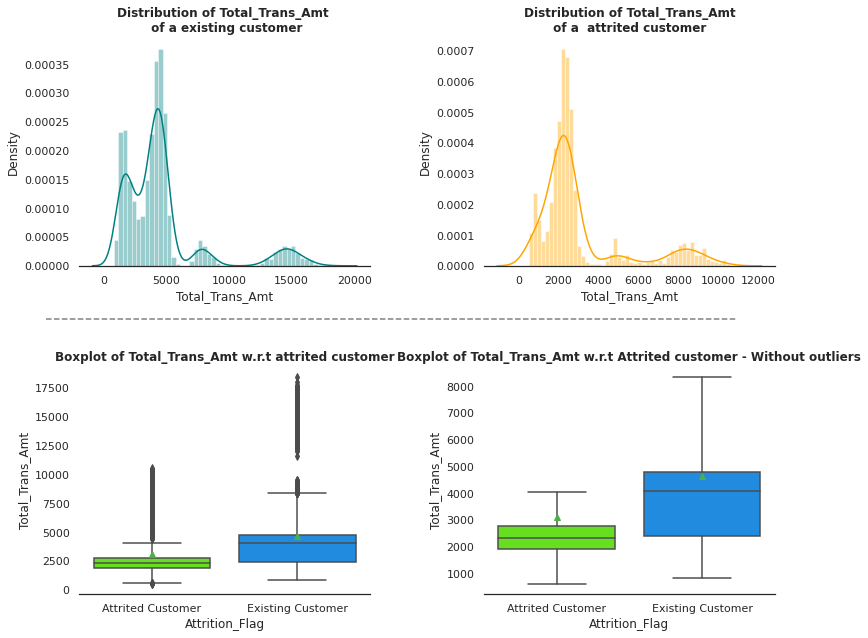

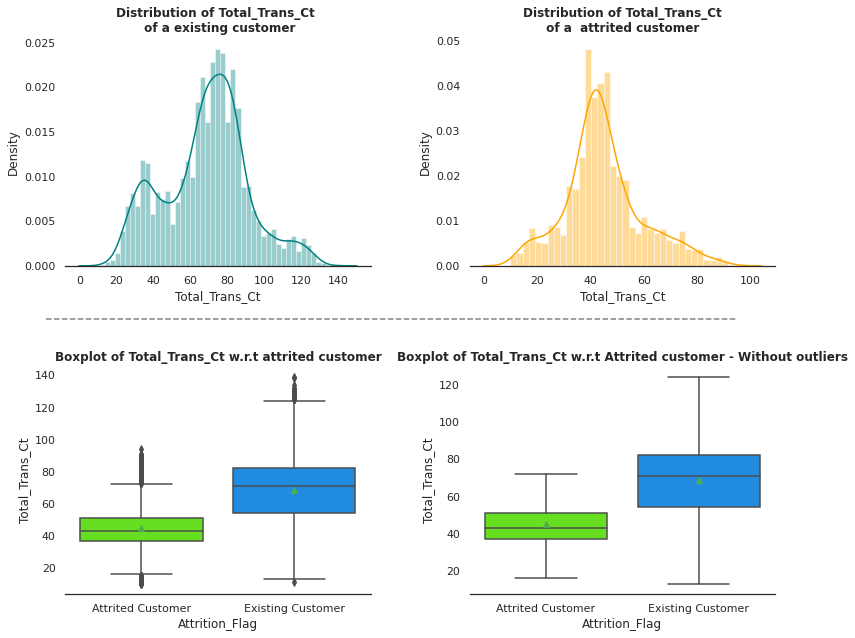

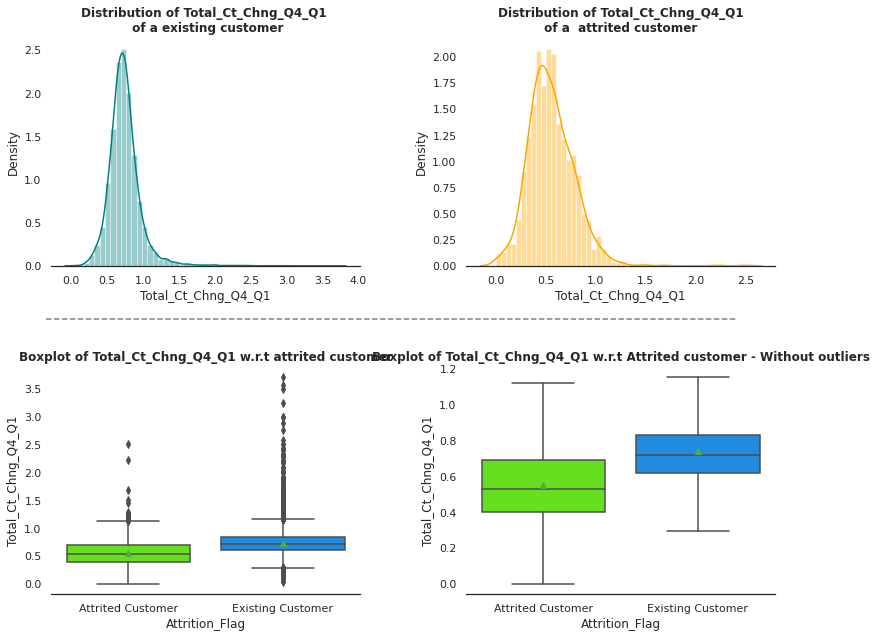

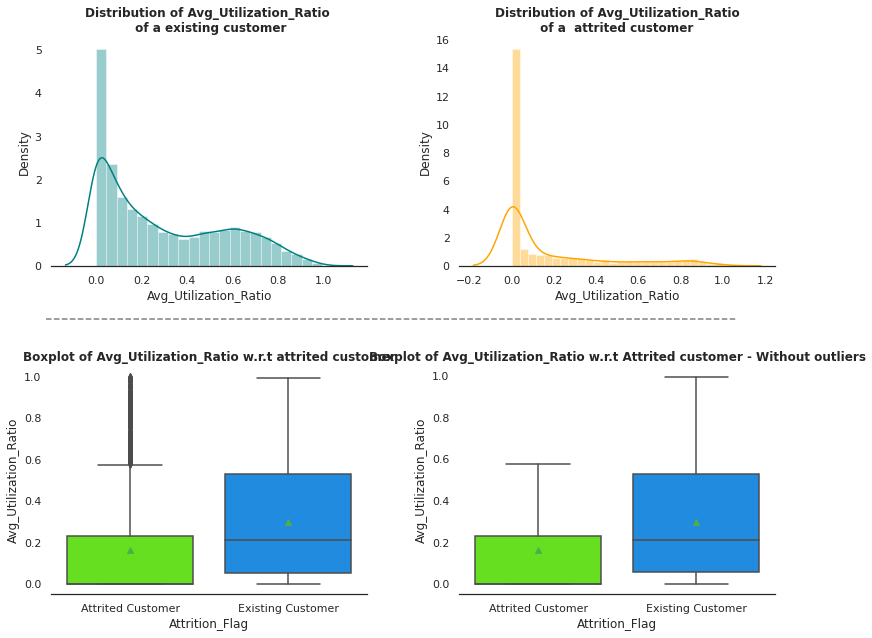

In [23]:
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col=df_credit.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])
   

**Observation**
- There is no difference in Age, months on book,credit limit,average open to buy, of attrited and existing customers. it doesnt seem to have any relation with attrition. 
- It seems existing customers have a higher Total Revolving Balance than customers who attrited.
- Customers with lesser transaction amount spend and low change in transaction_spend_Q1_Q4 were more likely to attrite. 
- The customers with low number of transactions and low change in number of transactions between Q1 and Q4 attrited.
- On average, customers  with less utlization attrited.


Text(0.5, 1.0, 'Income vs credit')

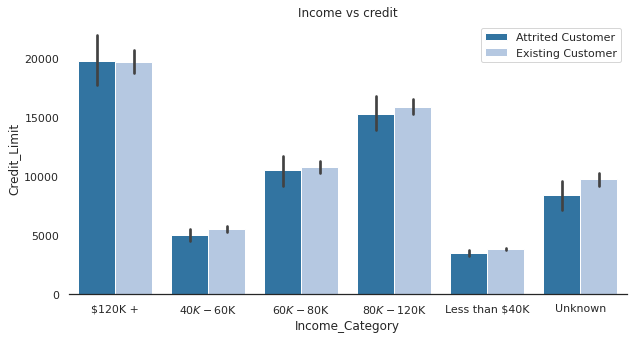

In [24]:
plt.figure(figsize=(10,5)) 
sns.set_palette(sns.color_palette("tab20", 8))

sns.barplot(y='Credit_Limit',x='Income_Category',hue='Attrition_Flag',data=df_credit)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('Income vs credit')

Text(0.5, 1.0, 'CustomerAge  vs Education')

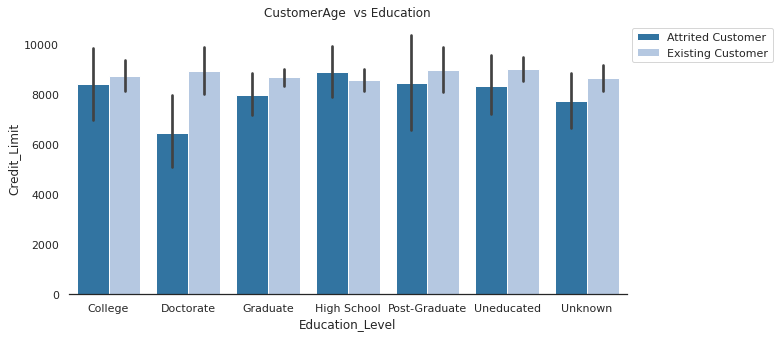

In [25]:
plt.figure(figsize=(10,5)) 
sns.set_palette(sns.color_palette("tab20", 9))
sns.barplot(y='Credit_Limit',x='Education_Level',hue='Attrition_Flag',data=df_credit)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('CustomerAge  vs Education')


Text(0.5, 1.0, 'CustomerAge  vs Credit limit')

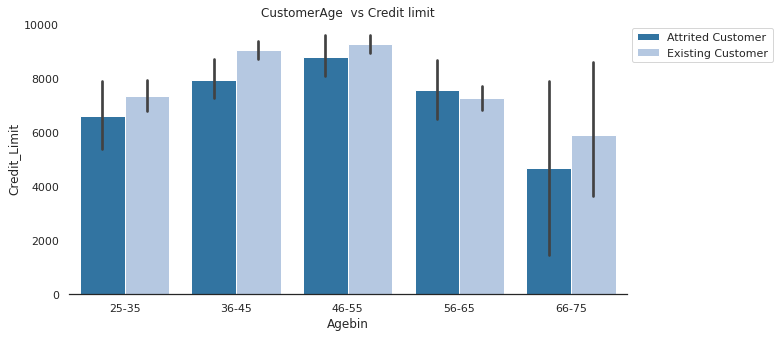

In [26]:
plt.figure(figsize=(10,5)) 
sns.set_palette(sns.color_palette("tab20", 9))
sns.barplot(x='Agebin',y='Credit_Limit',hue='Attrition_Flag',data=df_credit)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('CustomerAge  vs Credit limit')


Text(0.5, 1.0, 'CustomerAge  vs Total Revolving Balance')

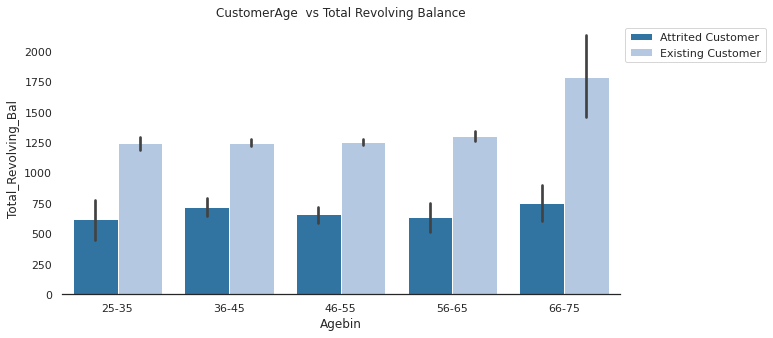

In [27]:
plt.figure(figsize=(10,5)) 
sns.set_palette(sns.color_palette("tab20", 9))
sns.barplot(x='Agebin',y='Total_Revolving_Bal',hue='Attrition_Flag',data=df_credit)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('CustomerAge  vs Total Revolving Balance')

Text(0.5, 1.0, 'CustomerAge  vs Total Transcational Amount')

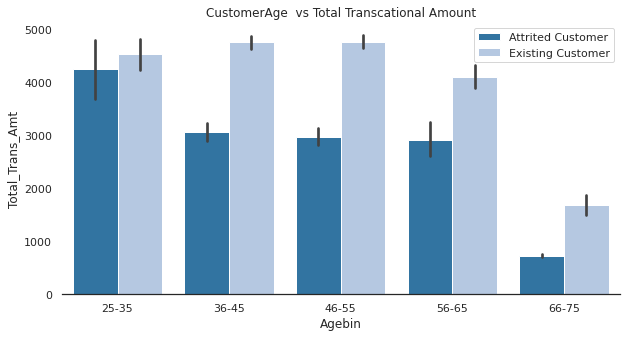

In [28]:
plt.figure(figsize=(10,5)) 
sns.set_palette(sns.color_palette("tab20", 9))
sns.barplot(x='Agebin',y='Total_Trans_Amt',hue='Attrition_Flag',data=df_credit)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('CustomerAge  vs Total Transcational Amount')

Text(0.5, 1.0, 'Credit limit  vs Gender')

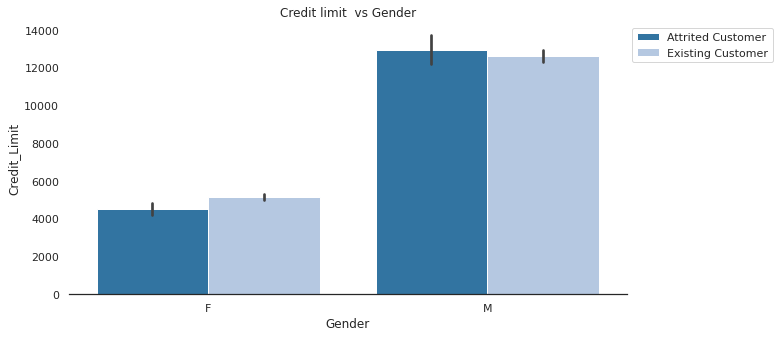

In [29]:

plt.figure(figsize=(10,5)) 
sns.barplot(y='Credit_Limit',x='Gender',hue='Attrition_Flag',data=df_credit) 
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('Credit limit  vs Gender')

Text(0.5, 1.0, 'Credit Limit  vs Card Category')

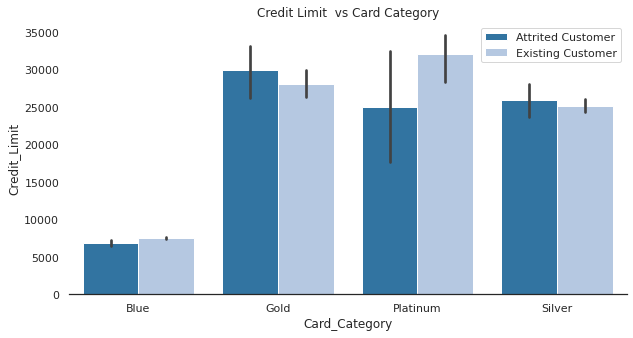

In [30]:

plt.figure(figsize=(10,5))
sns.barplot(y='Credit_Limit',x='Card_Category',hue='Attrition_Flag',data=df_credit) 
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('Credit Limit  vs Card Category')

Text(0.5, 1.0, 'Total Transcation Amount  vs Card')

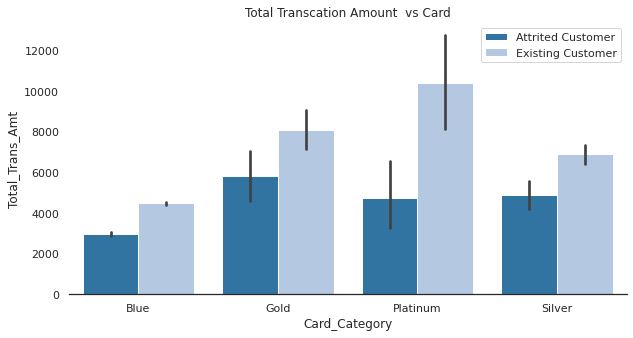

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(y='Total_Trans_Amt',x='Card_Category',hue='Attrition_Flag',data=df_credit) 
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('Total Transcation Amount  vs Card')

Text(0.5, 1.0, 'Total Transcation Count  vs Card Category')

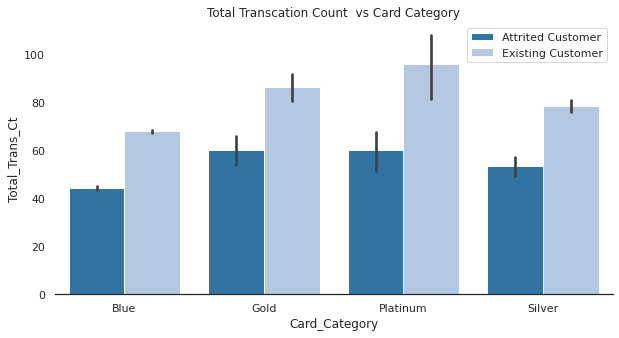

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(y='Total_Trans_Ct',x='Card_Category',hue='Attrition_Flag',data=df_credit) 
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.00, 1))
plt.title('Total Transcation Count  vs Card Category')

**Observation**
- Customer with 35-55 were given more credit limit.
- Plantinum card holder had higher credit limit
- Customer earning more than 120 k had higher credit limit
- Male customer were given more credit limit than female

In [33]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("tab20", 8))
    tab1 = pd.crosstab(x,df_credit['Attrition_Flag'],margins=True)
    display(tab1)
    tab = pd.crosstab(x,df_credit['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(9,5))
    plt.xticks(rotation=360)
    #labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left",title=" ",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
Existing Customer                  0               8500   8500
All                             1627               8500  10127

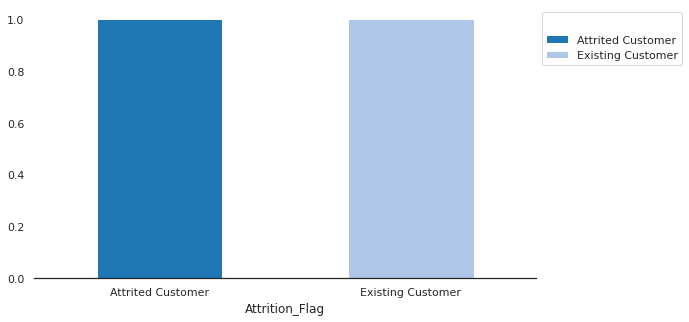

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127

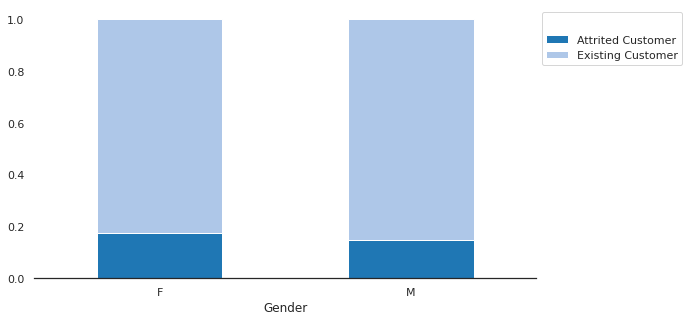

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127

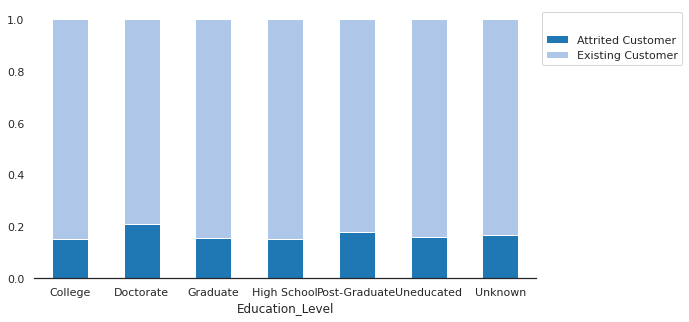

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127

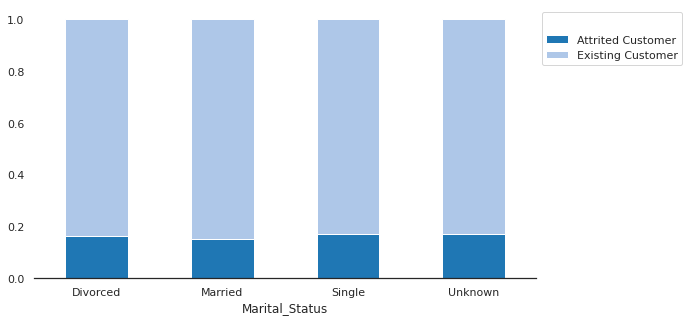

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127

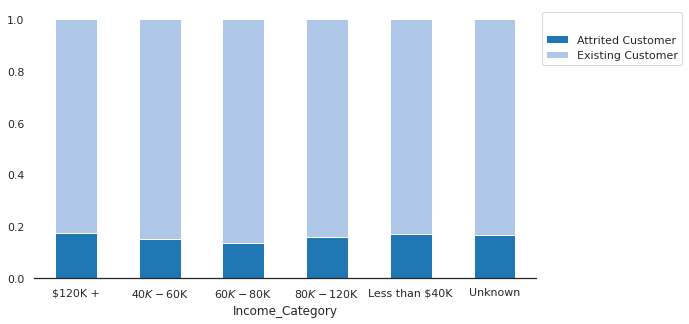

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127

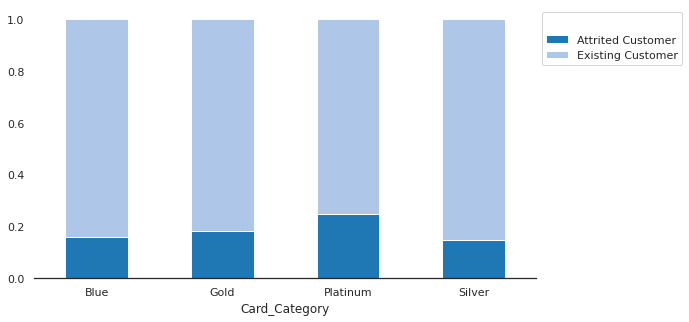

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127

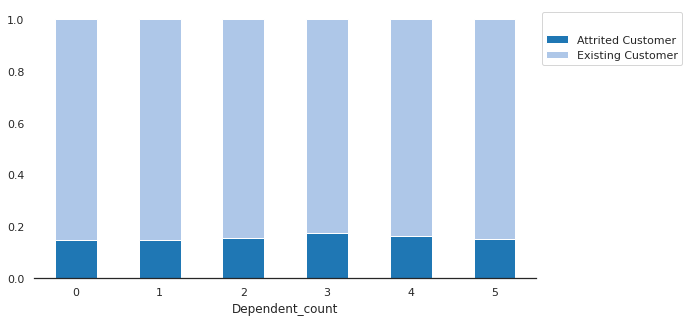

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127

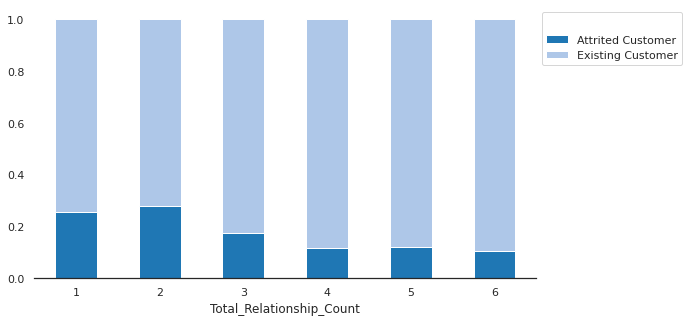

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127

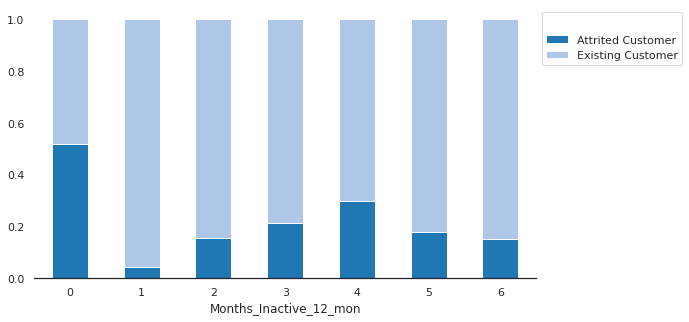

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127

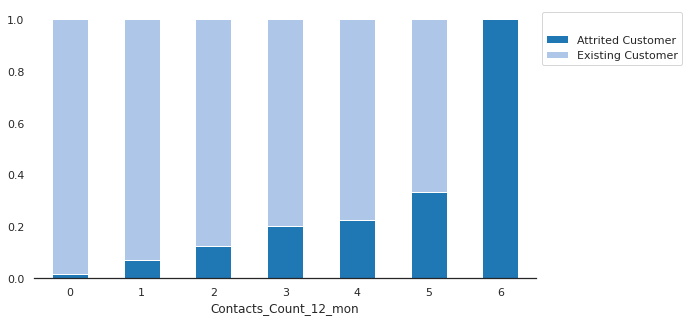

Attrition_Flag  Attrited Customer  Existing Customer    All
Agebin                                                     
25-35                         122                797    919
36-45                         606               3136   3742
46-55                         688               3447   4135
56-65                         209               1112   1321
66-75                           2                  8     10
All                          1627               8500  10127

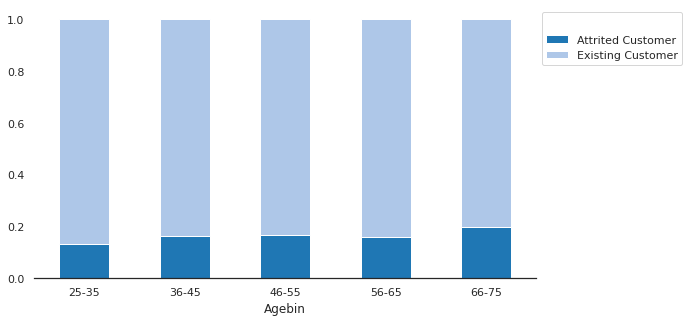

In [34]:
cat_cols.append("Agebin")
for i, variable in enumerate(cat_cols):
       stacked_plot(df_credit[variable])

**Observations**
- Female customer attrited more compared to male.
- Customers who were doctorate or postgraduate attrited most.
- Customers who were single attrited more.
- Customers who earned more than 120k and less than 40k.
- Customers with plantinum card attrited more but there are only 20 samples so this is inclusive. Customers with gold attrited more compared to blue and silver card. May be analyzing profile of customers with different card help us in identfying some pattern here.
- Custimer with 3 dependent attrited more.
- Customer having 1 or 2 bank product attrited more compared to customers with more bank products.
- Customers who were never inactive attrited most.we can't be sure about this we have only 29 samples.Customers who were inactive for 4 months attrited most followed by 3 month and 5 month.
- This is surpising , customer who were contacted most in last 12 month attrited.Did bank had any information about there attrition which was a reason bank was contacting those customers so many times.? or so much of contact from bank lead to attrition
- Customer in age range 66-75 attrited most , but this is inclusive since we have only 18 samples.Customer in age range 36-55 attrited more.


In [35]:
#Profile of Attrited Customer with Blue Card 
df_credit[(df_credit['Card_Category']=='Blue') & (df_credit['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count  unique                top      freq  \
Attrition_Flag                 1519       1  Attrited Customer      1519   
Customer_Age             1519.00000     NaN                NaN       NaN   
Gender                         1519       2                  F       890   
Dependent_count          1519.00000 6.00000            3.00000 456.00000   
Education_Level                1519       7           Graduate       450   
Marital_Status                 1519       4            Married       674   
Income_Category                1519       6     Less than $40K       586   
Card_Category                  1519       1               Blue      1519   
Months_on_book           1519.00000     NaN                NaN       NaN   
Total_Relationship_Count 1519.00000 6.00000            3.00000 386.00000   
Months_Inactive_12_mon   1519.00000 7.00000            3.00000 769.00000   
Contacts_Count_12_mon    1519.00000 7.00000            3.00000 634.00000   
Credit_Limit             1519.00000     NaN                NaN       NaN   
Total_Revolving_Bal      1519.00000     NaN                NaN       NaN   
Avg_Open_To_Buy          1519.00000     NaN                NaN       NaN   
Total_Amt_Chng_Q4_Q1     1519.00000     NaN                NaN       NaN   
Total_Trans_Amt          1519.00000     NaN                NaN       NaN   
Total_Trans_Ct           1519.00000     NaN                NaN       NaN   
Total_Ct_Chng_Q4_Q1      1519.00000     NaN                NaN       NaN   
Avg_Utilization_Ratio    1519.00000     NaN                NaN       NaN   
Agebin                         1519       5              46-55       634   

                               mean        std        min        25%  \
Attrition_Flag                  NaN        NaN        NaN        NaN   
Customer_Age               46.66228    7.69818   26.00000   41.00000   
Gender                          NaN        NaN        NaN        NaN   
Dependent_count                 NaN        NaN        NaN        NaN   
Education_Level                 NaN        NaN        NaN        NaN   
Marital_Status                  NaN        NaN        NaN        NaN   
Income_Category                 NaN        NaN        NaN        NaN   
Card_Category                   NaN        NaN        NaN        NaN   
Months_on_book             36.20013    7.82959   13.00000   32.00000   
Total_Relationship_Count        NaN        NaN        NaN        NaN   
Months_Inactive_12_mon          NaN        NaN        NaN        NaN   
Contacts_Count_12_mon           NaN        NaN        NaN        NaN   
Credit_Limit             6817.74733 7470.18771 1438.30000 2004.50000   
Total_Revolving_Bal       669.03555  922.33325    0.00000    0.00000   
Avg_Open_To_Buy          6148.71178 7500.48659    3.00000 1520.50000   
Total_Amt_Chng_Q4_Q1        0.69230    0.21256    0.00000    0.54400   
Total_Trans_Amt          2954.16458 2180.36497  510.00000 1896.00000   
Total_Trans_Ct             44.22646   14.13832   10.00000   37.00000   
Total_Ct_Chng_Q4_Q1         0.55036    0.22574    0.00000    0.40000   
Avg_Utilization_Ratio       0.17174    0.27103    0.00000    0.00000   
Agebin                          NaN        NaN        NaN        NaN   

                                50%        75%         max  
Attrition_Flag                  NaN        NaN         NaN  
Customer_Age               47.00000   52.00000    68.00000  
Gender                          NaN        NaN         NaN  
Dependent_count                 NaN        NaN         NaN  
Education_Level                 NaN        NaN         NaN  
Marital_Status                  NaN        NaN         NaN  
Income_Category                 NaN        NaN         NaN  
Card_Category                   NaN        NaN         NaN  
Months_on_book             36.00000   40.00000    56.00000  
Total_Relationship_Count        NaN        NaN         NaN  
Months_Inactive_12_mon          NaN        NaN         NaN  
Contacts_Count_12_mon           NaN     

In [36]:
#Profile of Attrited Customer with gold Card 
df_credit[(df_credit['Card_Category']=='Gold') & (df_credit['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count  unique                top     freq  \
Attrition_Flag                 21       1  Attrited Customer       21   
Customer_Age             21.00000     NaN                NaN      NaN   
Gender                         21       2                  M       13   
Dependent_count          21.00000 6.00000            2.00000  7.00000   
Education_Level                21       7           Graduate        6   
Marital_Status                 21       3             Single       11   
Income_Category                21       6        $60K - $80K        6   
Card_Category                  21       1               Gold       21   
Months_on_book           21.00000     NaN                NaN      NaN   
Total_Relationship_Count 21.00000 6.00000            2.00000  8.00000   
Months_Inactive_12_mon   21.00000 3.00000            3.00000 14.00000   
Contacts_Count_12_mon    21.00000 6.00000            3.00000  8.00000   
Credit_Limit             21.00000     NaN                NaN      NaN   
Total_Revolving_Bal      21.00000     NaN                NaN      NaN   
Avg_Open_To_Buy          21.00000     NaN                NaN      NaN   
Total_Amt_Chng_Q4_Q1     21.00000     NaN                NaN      NaN   
Total_Trans_Amt          21.00000     NaN                NaN      NaN   
Total_Trans_Ct           21.00000     NaN                NaN      NaN   
Total_Ct_Chng_Q4_Q1      21.00000     NaN                NaN      NaN   
Avg_Utilization_Ratio    21.00000     NaN                NaN      NaN   
Agebin                         21       4              36-45        9   

                                mean        std         min         25%  \
Attrition_Flag                   NaN        NaN         NaN         NaN   
Customer_Age                43.85714    6.22323    32.00000    41.00000   
Gender                           NaN        NaN         NaN         NaN   
Dependent_count                  NaN        NaN         NaN         NaN   
Education_Level                  NaN        NaN         NaN         NaN   
Marital_Status                   NaN        NaN         NaN         NaN   
Income_Category                  NaN        NaN         NaN         NaN   
Card_Category                    NaN        NaN         NaN         NaN   
Months_on_book              33.90476    6.15552    20.00000    32.00000   
Total_Relationship_Count         NaN        NaN         NaN         NaN   
Months_Inactive_12_mon           NaN        NaN         NaN         NaN   
Contacts_Count_12_mon            NaN        NaN         NaN         NaN   
Credit_Limit             29878.52381 7832.30742 15109.00000 23981.00000   
Total_Revolving_Bal       1027.00000 1009.46223     0.00000     0.00000   
Avg_Open_To_Buy          28851.52381 7757.52462 13640.00000 23981.00000   
Total_Amt_Chng_Q4_Q1         0.76990    0.25588     0.19600     0.59100   
Total_Trans_Amt           5841.80952 2836.81313  1727.00000  2315.00000   
Total_Trans_Ct              59.85714   14.40238    34.00000    47.00000   
Total_Ct_Chng_Q4_Q1          0.61905    0.20050     0.21400     0.47800   
Avg_Utilization_Ratio        0.03629    0.03545     0.00000     0.00000   
Agebin                           NaN        NaN         NaN         NaN   

                                 50%         75%         max  
Attrition_Flag                   NaN         NaN         NaN  
Customer_Age                44.00000    47.00000    59.00000  
Gender                           NaN         NaN         NaN  
Dependent_count                  NaN         NaN         NaN  
Education_Level                  NaN         NaN         NaN  
Marital_Status                   NaN         NaN         NaN  
Income_Category                  NaN         NaN         NaN  
Card_Category                    NaN         NaN         NaN  
Months_on_book              36.00000    36.00000    48.00000  
Total_Relationship_Count         NaN         NaN         NaN  
Months_Inactive_12_mon           NaN         NaN         NaN  
Contacts_Count

In [37]:
#Profile of Attrited Customer with silver  Card 
df_credit[(df_credit['Card_Category']=='Silver') & (df_credit['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count  unique                top     freq  \
Attrition_Flag                 82       1  Attrited Customer       82   
Customer_Age             82.00000     NaN                NaN      NaN   
Gender                         82       2                  M       54   
Dependent_count          82.00000 6.00000            2.00000 23.00000   
Education_Level                82       7           Graduate       28   
Marital_Status                 82       4             Single       43   
Income_Category                82       6       $80K - $120K       22   
Card_Category                  82       1             Silver       82   
Months_on_book           82.00000     NaN                NaN      NaN   
Total_Relationship_Count 82.00000 6.00000            2.00000 23.00000   
Months_Inactive_12_mon   82.00000 6.00000            3.00000 40.00000   
Contacts_Count_12_mon    82.00000 6.00000            3.00000 37.00000   
Credit_Limit             82.00000     NaN                NaN      NaN   
Total_Revolving_Bal      82.00000     NaN                NaN      NaN   
Avg_Open_To_Buy          82.00000     NaN                NaN      NaN   
Total_Amt_Chng_Q4_Q1     82.00000     NaN                NaN      NaN   
Total_Trans_Amt          82.00000     NaN                NaN      NaN   
Total_Trans_Ct           82.00000     NaN                NaN      NaN   
Total_Ct_Chng_Q4_Q1      82.00000     NaN                NaN      NaN   
Avg_Utilization_Ratio    82.00000     NaN                NaN      NaN   
Agebin                         82       4              46-55       42   

                                mean         std        min         25%  \
Attrition_Flag                   NaN         NaN        NaN         NaN   
Customer_Age                47.15854     7.47088   30.00000    42.25000   
Gender                           NaN         NaN        NaN         NaN   
Dependent_count                  NaN         NaN        NaN         NaN   
Education_Level                  NaN         NaN        NaN         NaN   
Marital_Status                   NaN         NaN        NaN         NaN   
Income_Category                  NaN         NaN        NaN         NaN   
Card_Category                    NaN         NaN        NaN         NaN   
Months_on_book              36.36585     7.72124   18.00000    33.00000   
Total_Relationship_Count         NaN         NaN        NaN         NaN   
Months_Inactive_12_mon           NaN         NaN        NaN         NaN   
Contacts_Count_12_mon            NaN         NaN        NaN         NaN   
Credit_Limit             25960.26829 10054.77810 3735.00000 14890.00000   
Total_Revolving_Bal        677.24390   894.66458    0.00000     0.00000   
Avg_Open_To_Buy          25283.02439 10072.89178 3735.00000 14023.75000   
Total_Amt_Chng_Q4_Q1         0.70591     0.24399    0.00000     0.55225   
Total_Trans_Amt           4899.68293  3140.82380  691.00000  1929.50000   
Total_Trans_Ct              53.28049    17.49728   14.00000    41.00000   
Total_Ct_Chng_Q4_Q1          0.61301     0.24940    0.00000     0.43475   
Avg_Utilization_Ratio        0.03244     0.05179    0.00000     0.00000   
Agebin                           NaN         NaN        NaN         NaN   

                                 50%         75%         max  
Attrition_Flag                   NaN         NaN         NaN  
Customer_Age                48.00000    52.00000    65.00000  
Gender                           NaN         NaN         NaN  
Dependent_count                  NaN         NaN         NaN  
Education_Level                  NaN         NaN         NaN  
Marital_Status                   NaN         NaN         NaN  
Income_Category                  NaN         NaN         NaN  
Card_Category                    NaN         NaN         NaN  
Months_on_book              36.00000    42.75000    56.00000  
Total_Relationship_Count         NaN         NaN         NaN  
Months_Inactive_12_mon           NaN         NaN         NaN  
Contacts_Count

In [38]:
#Profile of Attrited Customer with platinum Card 
df_credit[(df_credit['Card_Category']=='Platinum') & (df_credit['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count  unique                top    freq  \
Attrition_Flag                 5       1  Attrited Customer       5   
Customer_Age             5.00000     NaN                NaN     NaN   
Gender                         5       2                  F       4   
Dependent_count          5.00000 4.00000            2.00000 2.00000   
Education_Level                5       3           Graduate       3   
Marital_Status                 5       2             Single       3   
Income_Category                5       3     Less than $40K       2   
Card_Category                  5       1           Platinum       5   
Months_on_book           5.00000     NaN                NaN     NaN   
Total_Relationship_Count 5.00000 3.00000            2.00000 3.00000   
Months_Inactive_12_mon   5.00000 2.00000            3.00000 3.00000   
Contacts_Count_12_mon    5.00000 3.00000            3.00000 2.00000   
Credit_Limit             5.00000     NaN                NaN     NaN   
Total_Revolving_Bal      5.00000     NaN                NaN     NaN   
Avg_Open_To_Buy          5.00000     NaN                NaN     NaN   
Total_Amt_Chng_Q4_Q1     5.00000     NaN                NaN     NaN   
Total_Trans_Amt          5.00000     NaN                NaN     NaN   
Total_Trans_Ct           5.00000     NaN                NaN     NaN   
Total_Ct_Chng_Q4_Q1      5.00000     NaN                NaN     NaN   
Avg_Utilization_Ratio    5.00000     NaN                NaN     NaN   
Agebin                         5       2              46-55       4   

                                mean        std         min         25%  \
Attrition_Flag                   NaN        NaN         NaN         NaN   
Customer_Age                49.40000    4.15933    43.00000    48.00000   
Gender                           NaN        NaN         NaN         NaN   
Dependent_count                  NaN        NaN         NaN         NaN   
Education_Level                  NaN        NaN         NaN         NaN   
Marital_Status                   NaN        NaN         NaN         NaN   
Income_Category                  NaN        NaN         NaN         NaN   
Card_Category                    NaN        NaN         NaN         NaN   
Months_on_book              36.00000    4.52769    31.00000    32.00000   
Total_Relationship_Count         NaN        NaN         NaN         NaN   
Months_Inactive_12_mon           NaN        NaN         NaN         NaN   
Contacts_Count_12_mon            NaN        NaN         NaN         NaN   
Credit_Limit             24997.40000 9281.90682 15987.00000 15987.00000   
Total_Revolving_Bal        263.40000  284.58795     0.00000     0.00000   
Avg_Open_To_Buy          24734.00000 9212.95080 15794.00000 15987.00000   
Total_Amt_Chng_Q4_Q1         0.78480    0.22978     0.43500     0.69500   
Total_Trans_Amt           4755.80000 2073.95292  2021.00000  3901.00000   
Total_Trans_Ct              60.20000   10.03494    46.00000    54.00000   
Total_Ct_Chng_Q4_Q1          0.54560    0.14819     0.39400     0.42100   
Avg_Utilization_Ratio        0.01040    0.01064     0.00000     0.00000   
Agebin                           NaN        NaN         NaN         NaN   

                                 50%         75%         max  
Attrition_Flag                   NaN         NaN         NaN  
Customer_Age                51.00000    51.00000    54.00000  
Gender                           NaN         NaN         NaN  
Dependent_count                  NaN         NaN         NaN  
Education_Level                  NaN         NaN         NaN  
Marital_Status                   NaN         NaN         NaN  
Income_Category                  NaN         NaN         NaN  
Card_Category                    NaN         NaN         NaN  
Months_on_book              37.00000    38.00000    42.00000  
Total_Relationship_Count         NaN         NaN         NaN  
Months_Inactive_12_mon           NaN         NaN         NaN  
Contacts_Count_12_mon            NaN         NaN         

**Profile of customer who attrited most based on there card type**
-  Blue Card
    - Most likely  Female who were married ,  age group 46-55  and earning less than 40 k, Education level graduate and dependent member 3 , total bank product 3 and were inactive for 3 months. There average utilzation ratio was very low
    
- Gold Card
    - Most likely Male who are single , between age group 36-45  earning 60- 80k, education level graduate and inactive for 3 months
- Silver Card
    - Most likely Male who are single , between age group 46-55 , earned between 80 k -120 k ,education level graduate and inactive for 3 months
-  Platinum card
    - Most likely Female who were single , age group 46-55 ,earning less than 40 k , education level graduate and inactive for 3 months





<a id='ins'>
 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Insights based on EDA</h2>


- ~16% customer attrited .
- Female customer attrited more compared to male.
- Customers who were single attrited more.
- Customers who earned more than 120k and less than 40k.
- Customers with plantinum card attrited more but there are only 20 samples so this is inclusive. Customers with gold attrited more compared to blue and silver card.
- Customer in age range 36-55 attrited more.
- Customers who were doctorate or postgraduate attrited most. 
- Surprising  Attrition has been higher when there is higher number of contacts with the Bank in the last 12 months.

 <a id='od'></a>
 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Outlier Detection</h2>


In [39]:
Q1 = df_credit.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df_credit.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [40]:
((df_credit.select_dtypes(include=['float64','int64'])<lower) | (df_credit.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df_credit)*100

Customer_Age            0.01975
Months_on_book          3.81159
Credit_Limit            9.71660
Total_Revolving_Bal     0.00000
Avg_Open_To_Buy         9.50923
Total_Amt_Chng_Q4_Q1    3.91034
Total_Trans_Amt         8.84764
Total_Trans_Ct          0.01975
Total_Ct_Chng_Q4_Q1     3.89059
Avg_Utilization_Ratio   0.00000
dtype: float64

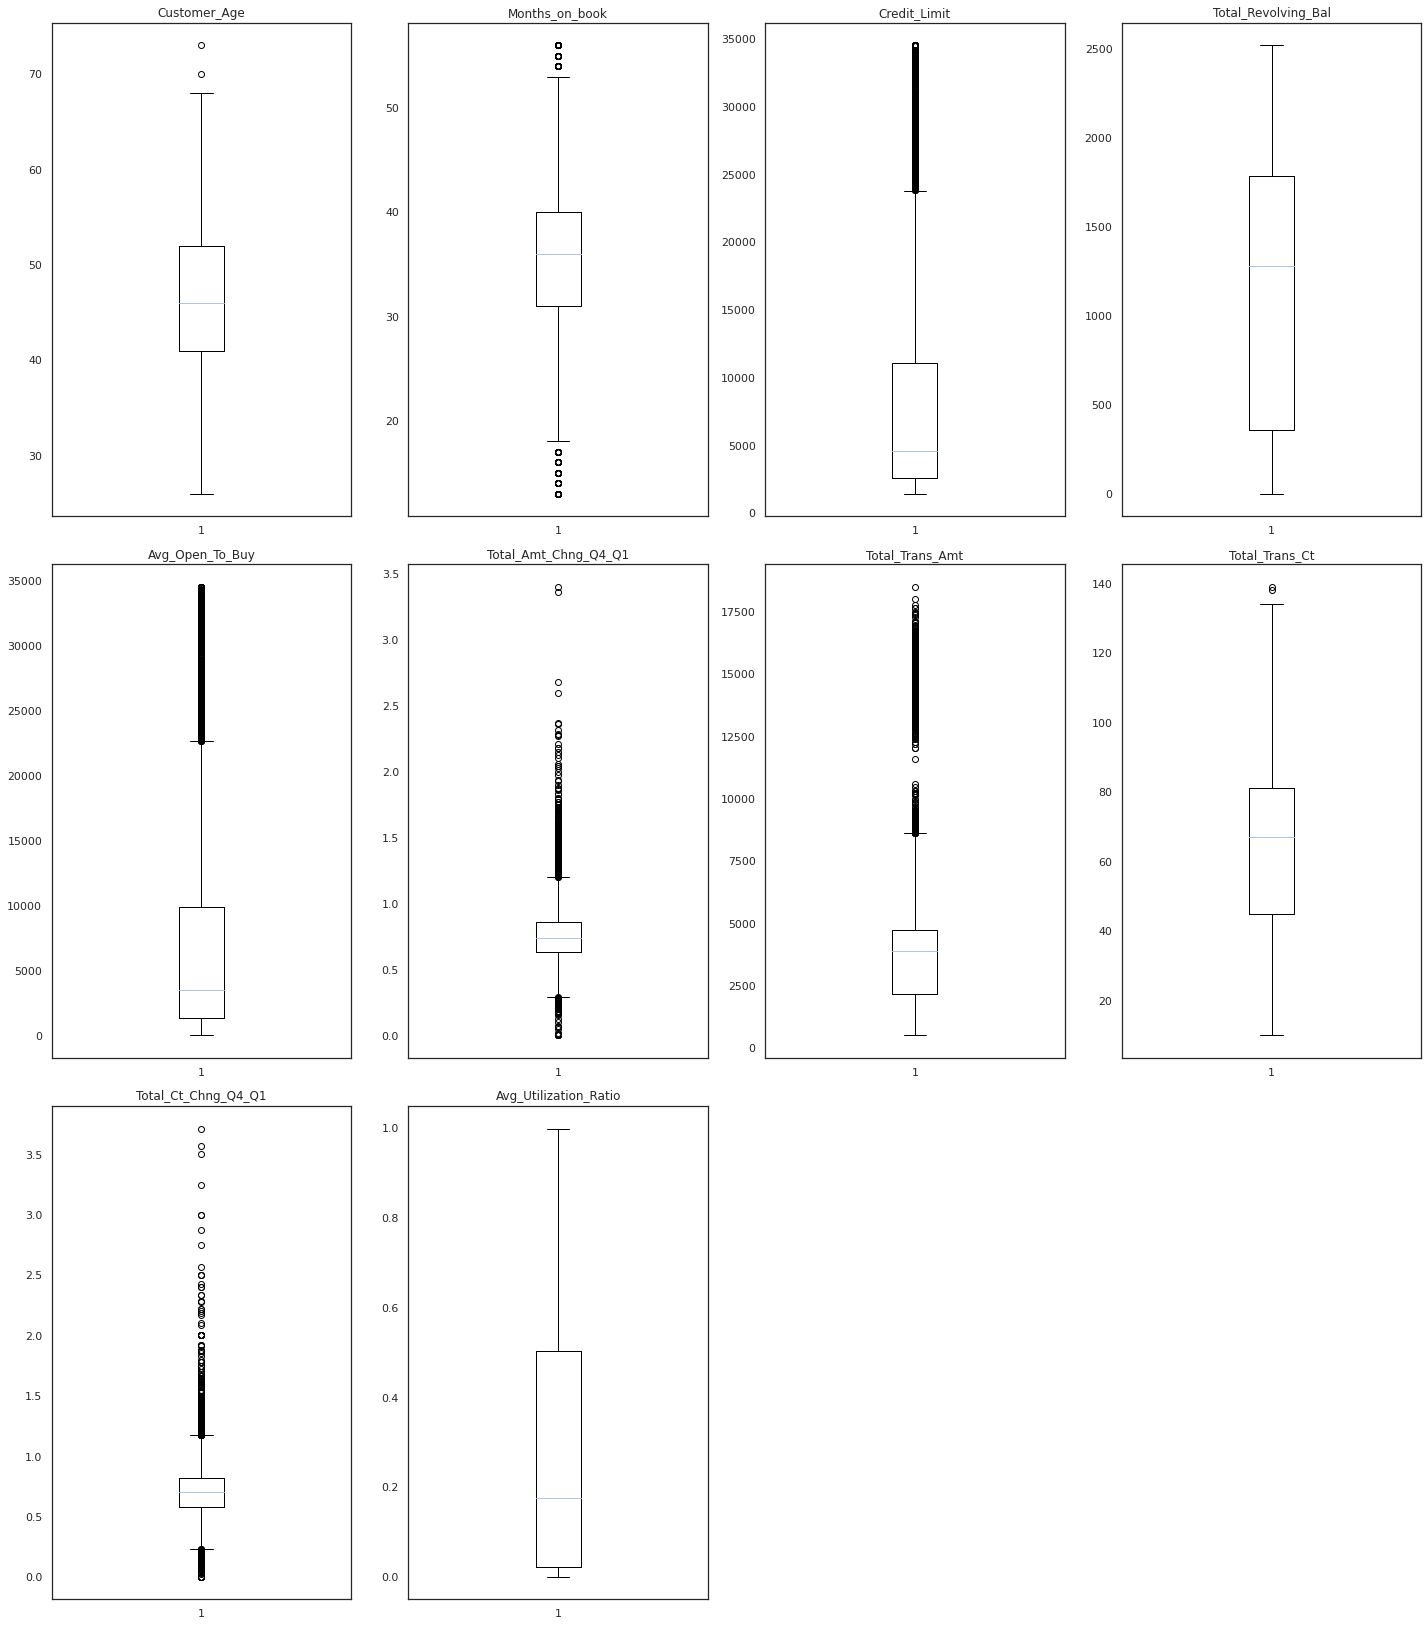

In [41]:
numeric_columns = df_credit.select_dtypes('number').columns.to_list()
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_credit[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [42]:
print(upper)

Customer_Age               68.50000
Months_on_book             53.50000
Credit_Limit            23836.25000
Total_Revolving_Bal      3921.50000
Avg_Open_To_Buy         22660.75000
Total_Amt_Chng_Q4_Q1        1.20100
Total_Trans_Amt          8619.25000
Total_Trans_Ct            135.00000
Total_Ct_Chng_Q4_Q1         1.17200
Avg_Utilization_Ratio       1.22300
dtype: float64


In [43]:
df_credit[df_credit['Credit_Limit'] > upper.Credit_Limit].sort_values(by='Credit_Limit',ascending=False ).count()

Attrition_Flag              984
Customer_Age                984
Gender                      984
Dependent_count             984
Education_Level             984
Marital_Status              984
Income_Category             984
Card_Category               984
Months_on_book              984
Total_Relationship_Count    984
Months_Inactive_12_mon      984
Contacts_Count_12_mon       984
Credit_Limit                984
Total_Revolving_Bal         984
Avg_Open_To_Buy             984
Total_Amt_Chng_Q4_Q1        984
Total_Trans_Amt             984
Total_Trans_Ct              984
Total_Ct_Chng_Q4_Q1         984
Avg_Utilization_Ratio       984
Agebin                      984
dtype: int64

In [44]:
df_credit[df_credit['Credit_Limit']== 34516.00000].count() # had seen this number during EDA so verifying


Attrition_Flag              508
Customer_Age                508
Gender                      508
Dependent_count             508
Education_Level             508
Marital_Status              508
Income_Category             508
Card_Category               508
Months_on_book              508
Total_Relationship_Count    508
Months_Inactive_12_mon      508
Contacts_Count_12_mon       508
Credit_Limit                508
Total_Revolving_Bal         508
Avg_Open_To_Buy             508
Total_Amt_Chng_Q4_Q1        508
Total_Trans_Amt             508
Total_Trans_Ct              508
Total_Ct_Chng_Q4_Q1         508
Avg_Utilization_Ratio       508
Agebin                      508
dtype: int64

508 customer have credit limit at 34516, it seems to be some default value.

In [45]:
df_credit[df_credit['Total_Trans_Amt'] > upper.Total_Trans_Amt].sort_values(by='Total_Trans_Amt',ascending=False ).head(10)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
9964   Existing Customer            47      M               4         Unknown   
10073  Existing Customer            51      M               2        Graduate   
10097  Existing Customer            31      M               0     High School   
9601   Existing Customer            45      M               4     High School   
9341   Existing Customer            48      M               2     High School   
10117  Existing Customer            57      M               2        Graduate   
10028  Existing Customer            36      F               1        Graduate   
9643   Existing Customer            54      F               2        Graduate   
9712   Existing Customer            49      M               4   Post-Graduate   
9645   Existing Customer            35      M               3   Post-Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
9964         Married     $60K - $80K          Blue              36   
10073        Married     $60K - $80K          Blue              40   
10097         Single     $40K - $60K          Blue              25   
9601          Single     $60K - $80K          Blue              35   
9341         Married  Less than $40K        Silver              36   
10117        Married    $80K - $120K          Blue              40   
10028         Single  Less than $40K          Blue              16   
9643         Married     $40K - $60K          Blue              41   
9712          Single    $80K - $120K          Blue              42   
9645         Married    $80K - $120K          Blue              28   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
9964                         4                      5                     2   
10073                        3                      3                     3   
10097                        3                      2                     3   
9601                         1                      1                     3   
9341                         2                      2                     2   
10117                        6                      3                     4   
10028                        6                      5                     3   
9643                         3                      1                     3   
9712                         3                      2                     1   
9645                         3                      1                     2   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9964    10585.00000                 1749       8836.00000   
10073    3750.00000                 1801       1949.00000   
10097    4493.00000                 1388       3105.00000   
9601     8449.00000                 2092       6357.00000   
9341    14581.00000                 2517      12064.00000   
10117   17925.00000                 1909      16016.00000   
10028    6091.00000                 1184       4907.00000   
9643     7362.00000                 1176       6186.00000   
9712    30885.00000                 2018      28867.00000   
9645     4380.00000                    0       4380.00000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9964                0.65500            18484             108   
10073               0.88900            17995             116   
10097               0.79500            17744             104   
9601                0.70900            17634             120   
9341                0.77600            17628             109   
10117               0.71200            17498             111   
10028               0.76600            17437             113   
9643                0.73500            17390             130   
9712                0.90400            17350             115   
9645                0.71900            17258             121   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Agebin  
9964               0.58800               

896 customers has transcational amount greater than 8619.25000.With number of transcation count this data seems to be correct.

In [46]:
df_credit[df_credit['Avg_Open_To_Buy'] > upper.Avg_Open_To_Buy].sort_values(by='Avg_Open_To_Buy',ascending=False ).head(10)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
10112  Attrited Customer            33      M               2         College   
9047   Attrited Customer            50      M               1   Post-Graduate   
2196   Existing Customer            50      M               3     High School   
2201   Attrited Customer            55      F               2         College   
9127   Existing Customer            56      F               3      Uneducated   
2341   Existing Customer            52      M               1         Unknown   
9075   Existing Customer            51      M               3      Uneducated   
9073   Existing Customer            39      M               2         Unknown   
9068   Attrited Customer            54      F               0        Graduate   
9027   Attrited Customer            44      M               4         Unknown   

      Marital_Status Income_Category Card_Category  Months_on_book  \
10112        Married         $120K +          Gold              20   
9047         Unknown    $80K - $120K          Gold              36   
2196         Married         $120K +          Blue              40   
2201          Single         Unknown        Silver              36   
9127          Single         Unknown      Platinum              46   
2341          Single         $120K +          Blue              44   
9075         Married    $80K - $120K        Silver              37   
9073          Single    $80K - $120K          Gold              33   
9068          Single         Unknown      Platinum              38   
9027         Married         $120K +          Blue              36   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
10112                        2                      1                     4   
9047                         2                      3                     2   
2196                         5                      1                     4   
2201                         2                      3                     3   
9127                         2                      3                     2   
2341                         6                      1                     2   
9075                         1                      2                     1   
9073                         1                      3                     2   
9068                         2                      2                     2   
9027                         4                      3                     3   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10112   34516.00000                    0      34516.00000   
9047    34516.00000                    0      34516.00000   
2196    34516.00000                    0      34516.00000   
2201    34516.00000                    0      34516.00000   
9127    34516.00000                    0      34516.00000   
2341    34516.00000                    0      34516.00000   
9075    34516.00000                    0      34516.00000   
9073    34516.00000                    0      34516.00000   
9068    34516.00000                    0      34516.00000   
9027    34516.00000                    0      34516.00000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10112               1.00400             9338              73   
9047                1.03200             5547              75   
2196                0.98600             1930              36   
2201                0.39900             1353              40   
9127                0.88700             8416              93   
2341                1.03000             2848              56   
9075                0.81400             8736              97   
9073                0.72400             9179             113   
9068                0.69500             3901              54   
9027                1.04300             5425              60   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio Agebin  
10112              0.62200               

Not treating outliers here, and want alogorthims to learn about this outliers.

  <a id='ms'> </a>
   <div class=h2>Missing value Detection and Treatment </div>


There are Unknown values for the columns Education_Level,Marital_Status & Income_Category which can be treated as missing values. Replacing Unknown with nan

In [47]:
df_credit = df_credit.replace({'Unknown': None})


In [48]:
df_credit.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Agebin                         0
dtype: int64

In [49]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
 k-Nearest Neighbours (kNN)  identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [50]:
# Label Encode categorical variables  
attrition = {'Existing Customer':0, 'Attrited Customer':1}
df_credit['Attrition_Flag']=df_credit['Attrition_Flag'].map(attrition)

marital_status = {'Married':1,'Single':2, 'Divorced':3}
df_credit['Marital_Status']=df_credit['Marital_Status'].map(marital_status)


education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
df_credit['Education_Level']=df_credit['Education_Level'].map(education)

income = {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
df_credit['Income_Category']=df_credit['Income_Category'].map(income)



In [51]:
imputer = KNNImputer(n_neighbors=5)

In [52]:
reqd_col_for_impute = ['Income_Category','Education_Level','Marital_Status']

### Split the dataset

* Since we have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* For that we will use the `stratify` parameter in the train_test_split function.
* Dropping Avg_open_to_buy has it is highly correlated with credit limit

In [53]:
# Separating target column
X = df_credit.drop(['Agebin','Attrition_Flag','Avg_Open_To_Buy'],axis=1)
#X = pd.get_dummies(X,drop_first=True)
y = df_credit['Attrition_Flag']

In [54]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((7088, 18), (3039, 18))

In [55]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [56]:
#Checking that no column has missing values in train or test sets
print(X_train.isnull().sum())
print('-'*30)
print(X_test.isnull().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

In [57]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [58]:

inverse_mapping(education,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income,'Income_Category')



### Encoding categorical variables

In [59]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 46) (3039, 46)


In [60]:
X_train

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
4124            50              43    7985.00000                    0   
4686            50              36    5444.00000                 2499   
1276            26              13    1643.00000                 1101   
6119            65              55    2022.00000                    0   
2253            46              35    4930.00000                    0   
...            ...             ...           ...                  ...   
4581            50              36    1438.30000                    0   
9338            56              47    7204.00000                    0   
9950            45              36   34516.00000                    0   
1784            35              29   34516.00000                 1965   
4752            41              32    3189.00000                    0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
4124               1.03200             3873              72   
4686               0.46800             4509              80   
1276               0.71300             2152              50   
6119               0.57900             4623              65   
2253               1.01900             3343              77   
...                    ...              ...             ...   
4581               0.65800             2329              43   
9338               0.80300            14042             113   
9950               0.73200             8603              84   
1784               1.04400             2949              70   
4752               0.91000             4813              86   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
4124              0.67400                0.00000         0                  1   
4686              0.66700                0.45900         1                  0   
1276              0.47100                0.67000         0                  0   
6119              0.54800                0.00000         0                  0   
2253              0.63800                0.00000         1                  0   
...                   ...                    ...       ...                ...   
4581              0.59300                0.00000         0                  0   
9338              0.76600                0.00000         1                  0   
9950              0.61500                0.00000         1                  0   
1784              1.00000                0.05700         1                  0   
4752              0.75500                0.00000         0                  0   

      Dependent_count_2  ...  Months_Inactive_12_mon_1  \
4124                  0  ...                         1   
4686                  0  ...                         0   
1276                  0  ...                         0   
6119                  0  ...                         0   
2253                  0  ...                         0   
...                 ...  ...                       ...   
4581                  1  ...                         0   
9338                  0  ...                         1   
9950                  0  ...                         0   
1784                  0  ...                         0   
4752                  0  ...                         0   

      Months_Inactive_12_mon_2  Months_Inactive_12_mon_3  \
4124                         0                         0   
4686                         0                         1   
1276                         0                         1   
6119                         0                         1   
2253                         0                         1   
...                        ...                       ...   
4581                         1                         0   
9338                         0                         0   
9950                         1                         0   
1784                         1                         0   
4752                         0            

In [61]:
# # defining empty lists to add train and test results 
model_name=[]
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Blues',ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [62]:
def get_metrics_score(model,modelname,X_train_pass,X_test_df_pass,y_train_pass,y_test_pass):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    '''
    # defining an empty list to store train and test results
    score_list=[]
    
    pred_train = model.predict(X_train_pass)
    pred_test = model.predict(X_test_df_pass)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    model_name.append(modelname)  
    acc_train.append(score_list[0])
    acc_test.append(score_list[1])
    recall_train.append(score_list[2])
    recall_test.append(score_list[3])
    precision_train.append(score_list[4])
    precision_test.append(score_list[5])
    f1_train.append(score_list[6])
    f1_test.append(score_list[7])
    metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
    cols = ['Metric', 'Score']
    records = [(name, score) for name, score in zip(metric_names, score_list)]
    display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
    # display confusion matrix
    make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
    make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

<a id='Mb'></a>
<h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Model Building</h2>


### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will churn  but he does not - Loss of resources
2. Predicting a customer will not churn the services but he does - Loss of income

#### Which case is more important? 
* Predicting that customer will not churn but he does i.e. losing on a potential source of income for the bank  . Bank can  taken actions to stop these customer from churning.

#### How to reduce this loss i.e need to reduce False Negatives?
* Banks wants Recall to be maximized, greater the Recall lesser the chances of false negatives  means lesser chances of predicting customers will not churn when in reality they do.

In [63]:
#Initialize model using pipeline
pipe_lr = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

#Fit on train data
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.91196        0.91017       0.61984      0.62500   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.78707         0.77215         0.69352        0.69083

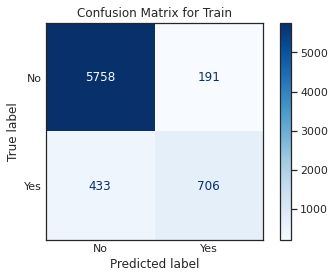

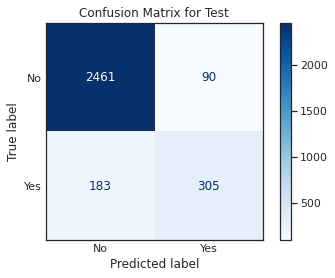

In [64]:
lr_score=get_metrics_score(pipe_lr,'LogisticRegression',X_train,X_test,y_train,y_test)

**Let's evaluate the model performance by using KFold and cross_val_score**

K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

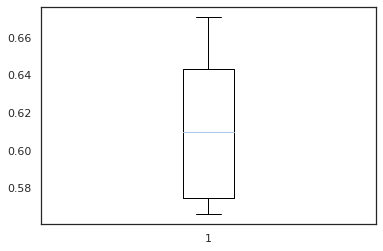

In [65]:
#Evaluate the model performance by using KFold and cross_val_score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
lr_cv_result=cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(lr_cv_result)
plt.show()

* Performance on training set is in range  between 0.58 to 0.66 recall with the average recall being 0.61

**Handling Imbalanced dataset**

This is an Imbalanced dataset .A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **`Synthetic Minority Oversampling Technique`**, or SMOTE for short.

### Over Sampling
Since dataset is imbalanced  let try oversampling using SMOTE and see if performance can be improved.

In [66]:
print(f"Before UpSampling, counts of label attrited customer: {sum(y_train==1)}")
print(f"Before UpSampling, counts of label existing customer: {sum(y_train==0)} \n")

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())

print(f"After UpSampling, counts of label attrited customer: {sum(y_train_over==1)}")
print(f"After UpSampling, counts of label existing customer: {sum(y_train_over==0)} \n")

print(f'After UpSampling, the shape of train_X: {X_train_over.shape}')
print(f'After UpSampling, the shape of train_y: {y_train_over.shape} \n')

Before UpSampling, counts of label attrited customer: 1139
Before UpSampling, counts of label existing customer: 5949 

After UpSampling, counts of label attrited customer: 5949
After UpSampling, counts of label existing customer: 5949 

After UpSampling, the shape of train_X: (11898, 46)
After UpSampling, the shape of train_y: (11898,) 



In [67]:
lr_over = LogisticRegression(solver='liblinear')
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(solver='liblinear')

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.93822        0.89964       0.91982      0.61475   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.95497         0.71942         0.93707        0.66298

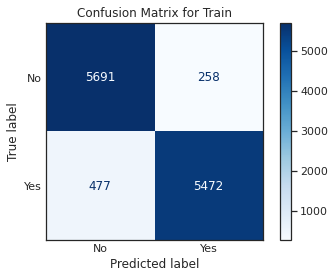

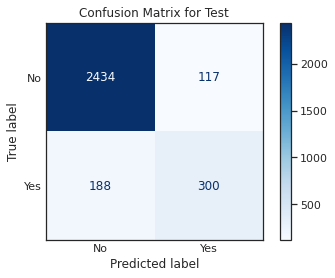

In [68]:
lr_score_over=get_metrics_score(lr_over,'LogisticRegression with over sampling',X_train_over,X_test,y_train_over,y_test)

The recall on test data is only 0.48 ,and model is overfitting there is lot of discrepancy between test score and train score. let try regularization

**What is Regularization ?**

Linear regression algorithm works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are large, they can lead to over-fitting on the training dataset, and such a model will not generalize well on the unseen test data.This is where regularization helps. Regularization is the process which regularizes or shrinks the coefficients towards zero. In simple words, regularization discourages learning a more complex or flexible model, to prevent overfitting.

**Main  Regularization Techniques**

**Ridge Regression (L2 Regularization)**

`Ridge regression` adds “squared magnitude” of coefficient as penalty term to the loss function.


**Lasso Regression (L1 Regularizaion)**

`Lasso` adds  "absolute values of magnitude  of coefficient  as penalty term to the loss function

**Elastic Net Regression**

`Elastic net regression` combines the properties of ridge and lasso regression. It works by penalizing the model using both the 1l2-norm1 and the 1l1-norm1. 

Elastic Net Formula: Ridge + Lasso


### Regularization on Oversampled dataset

In [69]:
# Choose the type of classifier. 
pipe_lr_reg = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

# Grid of parameters to choose from
parameters = {'logisticregression__C': np.arange(0.007,0.5,0.01),
              'logisticregression__solver' : ['liblinear','newton-cg','lbfgs','sag','saga'],
              'logisticregression__penalty': ['l1','l2']
             }

# Run the grid search
grid_obj = RandomizedSearchCV(pipe_lr_reg, parameters, scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
pipe_lr_reg = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
pipe_lr_reg.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.027000000000000003, random_state=1,
                                    solver='sag'))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.94117        0.90227       0.92150      0.60656   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.95923         0.73815         0.93999        0.66592

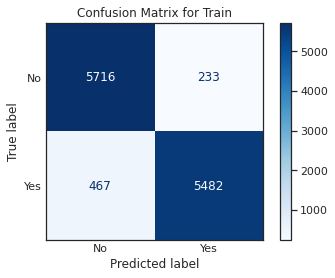

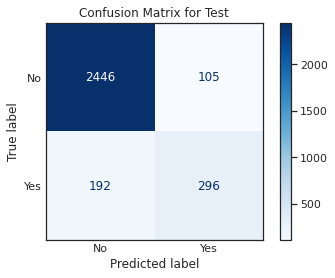

In [70]:
lr_score_under=get_metrics_score(pipe_lr_reg,'LogisticRegression with Regularization on Over sampling',X_train_over,X_test,y_train_over,y_test)

The recall on test data has improved let see if undersampling can improve the recall

### Undersampling 
Let see try undersampling and see if performance is different.

In [71]:
rus = RandomUnderSampler(random_state = 1) # Undersample dependent variable
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
#Undersample to balance classes
print("Before Under Sampling, counts of label 'Attrited': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'Existing': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Attrited': {}".format(sum(y_train_under==1)))
print("After Under Sampling, counts of label 'Existing': {} \n".format(sum(y_train_under==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_under.shape))
                                          

Before Under Sampling, counts of label 'Attrited': 1139
Before Under Sampling, counts of label 'Existing': 5949 

After Under Sampling, counts of label 'Attrited': 1139
After Under Sampling, counts of label 'Existing': 1139 

After Under Sampling, the shape of train_X: (2278, 46)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [72]:
# Initialize model using pipeline
pipe_lr_under = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

# Training the basic logistic regression model with training set 
pipe_lr_under.fit(X_train_under,y_train_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

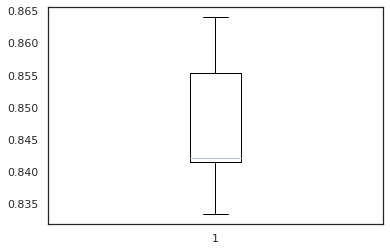

In [73]:
#Evaluate the model performance by using KFold and cross_val_score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=pipe_lr_under, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.85382        0.85127       0.85777      0.84836   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.85105         0.52273         0.85439        0.64688

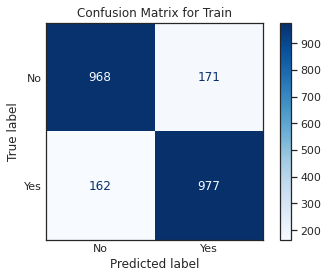

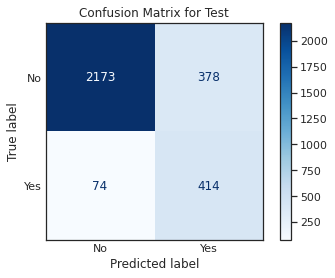

In [74]:
lr_score_under=get_metrics_score(pipe_lr_under,'LogisticRegression with under sampling',X_train_under,X_test,y_train_under,y_test)


### Observation

-  Model after undersampling is  generalized well on training and test set . Our recall after undersampling on test was better than our recall after oversampling on test.Let try regularization and see. Trying to use all the solver and different penality

In [75]:
# Choose the type of classifier. 
pipe_lr_reg_under = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

# Grid of parameters to choose from
parameters = {'logisticregression__C': np.arange(0.007,0.5,0.01),
              'logisticregression__solver' : ['liblinear','newton-cg','lbfgs','sag','saga'],
              'logisticregression__penalty': ['l1','l2']
             }

# Run the grid search
grid_obj = RandomizedSearchCV(pipe_lr_reg_under, parameters, scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train_under, y_train_under)

# Set the clf to the best combination of parameters
pipe_lr_reg_under = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
pipe_lr_reg_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.32700000000000007, random_state=1,
                                    solver='sag'))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.85250        0.85094       0.85162      0.84836   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.85312         0.52207         0.85237        0.64637

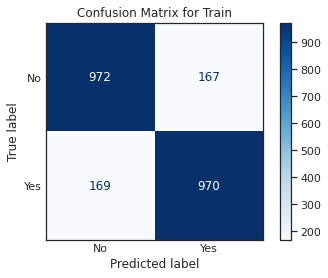

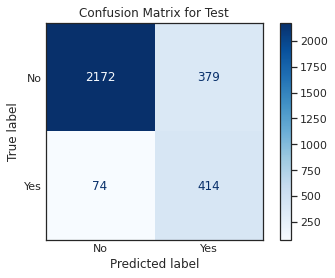

In [76]:
lr_score_reg=get_metrics_score(pipe_lr_reg_under,'LogisticRegression with Regularization on Undersampled',X_train_under,X_test,y_train_under,y_test)


<h1 style = "font-family:TimesNewRoman;color:black;font-weight:bold"> Model Performance Evaluation and Improvement-Logistic Regression</h1>

In [77]:
comparison_frame = pd.DataFrame({'Model':model_name,
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  \
3                   LogisticRegression with under sampling         0.85382   
4   LogisticRegression with Regularization on Undersampled         0.85250   
0                                       LogisticRegression         0.91196   
1                    LogisticRegression with over sampling         0.93822   
2  LogisticRegression with Regularization on Over sampling         0.94117   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
3        0.85127       0.85777      0.84836          0.85105         0.52273   
4        0.85094       0.85162      0.84836          0.85312         0.52207   
0        0.91017       0.61984      0.62500          0.78707         0.77215   
1        0.89964       0.91982      0.61475          0.95497         0.71942   
2        0.90227       0.92150      0.60656          0.95923         0.73815   

   Train_F1  Test_F1  
3   0.85439  0.64688  
4   0.85237  0.64637  
0   0.69352  0.69083  
1   0.93707  0.66298  
2   0.93999  0.66592

Logistic Regression with Under sampling is giving a generalized model and best recall with 0.857. 

<h1 style = "font-family:TimesNewRoman;color:black;font-weight:bold">  Model building Decision Tree ,Bagging and Boosting</h1>

Here I am building different models using KFold and cross_val_score with pipelines and  will tune the best model 3 models using GridSearchCV and RandomizedSearchCV

Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [78]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "BG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 78.22474688924956
RF: 71.64154880593554
BG: 79.45436277919468
GBM: 82.17443388206199
ADB: 81.56155808022258
XGB: 86.91591313084473


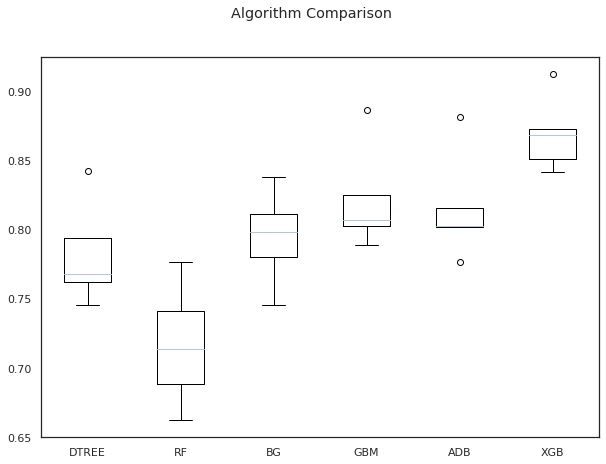

In [79]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall  with just one outlier followed by Gradient Boost, Adaboost. Bagging classifier had maxiumum recall ~ 84 but the minimum was 74 resulting into mean being only ~79. therefore I didn't choose bagging classfier.
- Best performing three models are XGBoost model, Gradient Boost, Adaboost.
- We will tune our 3 best models  to see if the performance improves after tuning

 <a id='ht'></a>
 <h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Hyper Parameter Tuning </h2>
We will use pipelines with StandardScaler and classifiers model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.

**Random Search** . Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.

**Grid Search** Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

We can also use the make_pipeline function instead of Pipeline to create a pipeline.

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

### Adaboost Using Grid Search

In [80]:
%%time
# Creating pipeline
pipe_ada_grid = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
pipe_ada_grid = GridSearchCV(estimator=pipe_ada_grid, param_grid=param_grid, scoring=scorer, cv=5,n_jobs = -1)

# Fitting parameters with undersampled train data in GridSeachCV
pipe_ada_grid.fit(X_train, y_train)
                              
print("Best parameters are {} with CV score={}:" .format(pipe_ada_grid.best_params_,pipe_ada_grid.best_score_))

Best parameters are {'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 70} with CV score=0.8639384805626402:
CPU times: user 7.55 s, sys: 409 ms, total: 7.96 s
Wall time: 4min 6s


In [81]:
# Creating new pipeline with best parameters
abc_tuned_grid = make_pipeline(
    StandardScaler(),AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, 
                                                                              random_state=1),
                                        learning_rate=1, n_estimators=70))

# Fit the model on undersampled training data
abc_tuned_grid.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=70))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.98434        0.96742       0.94469      0.89549   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.95730         0.90103         0.95095        0.89825

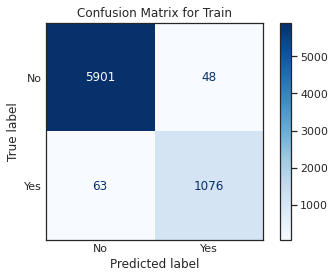

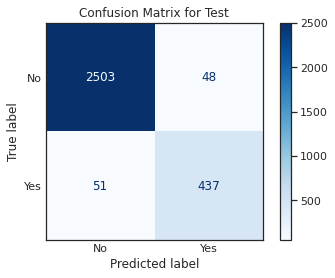

In [82]:
abc_tuned_score=get_metrics_score(abc_tuned_grid,' Adaboost with Grid Search',X_train,X_test,y_train,y_test)


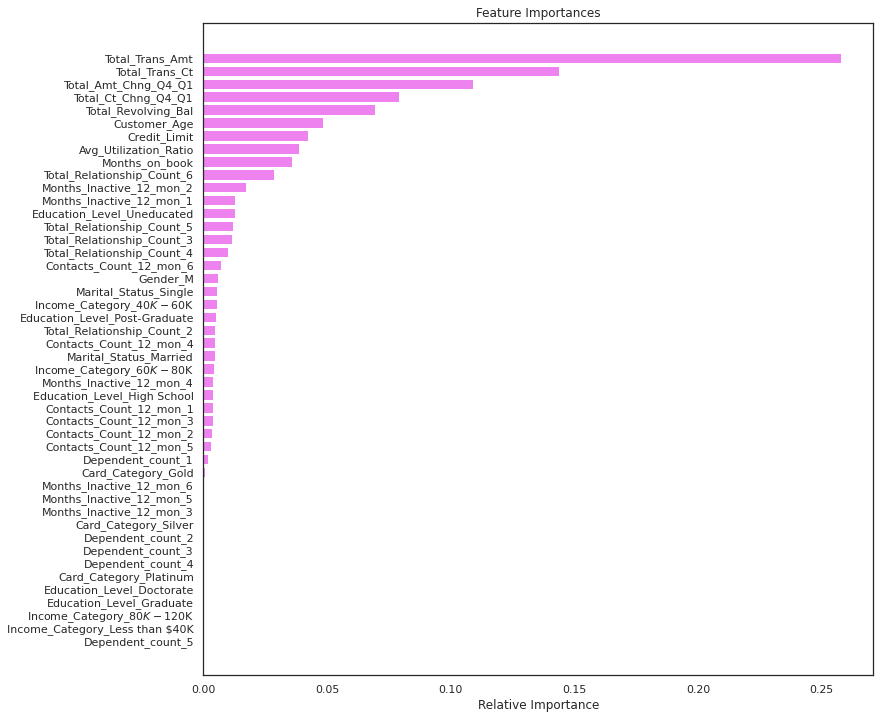

In [83]:
feature_names = X_train.columns
importances = abc_tuned_grid[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The test recall has increased by ~6% as compared to cross-validated recall
- Model is generalized , let see if random search give different result

### Adaboost Using Random Search

In [84]:
%%time

# Creating pipeline
pipe_ada_ran = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_rand_cv = RandomizedSearchCV(estimator=pipe_ada_ran, param_distributions=param_grid, n_iter=10,n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_rand_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(abc_rand_cv.best_params_,abc_rand_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8551472293067471:
CPU times: user 2.1 s, sys: 17.4 ms, total: 2.12 s
Wall time: 15.7 s


In [85]:
# Creating new pipeline with best parameters
abc_tuned_rand = make_pipeline(
    StandardScaler(),AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                              random_state=1),
                                        learning_rate=1, n_estimators=90))

# Fit the model on training data
abc_tuned_rand.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.99125        0.96775       0.96927      0.89344   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.97613         0.90456         0.97269        0.89897

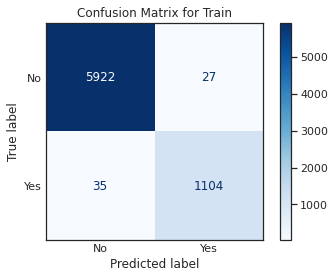

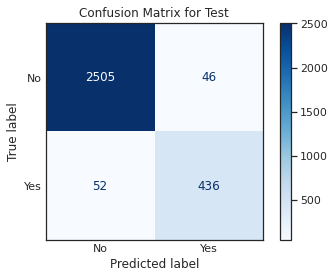

In [86]:
abc_rand_tuned_score=get_metrics_score(abc_tuned_rand,' Adaboost with Random Search',X_train,X_test,y_train,y_test)


- Here Random  search took a less  time , but the recall has improved with the  random search.False negative cases have reduced.
- Grid search took a significantly longer time than random search. 

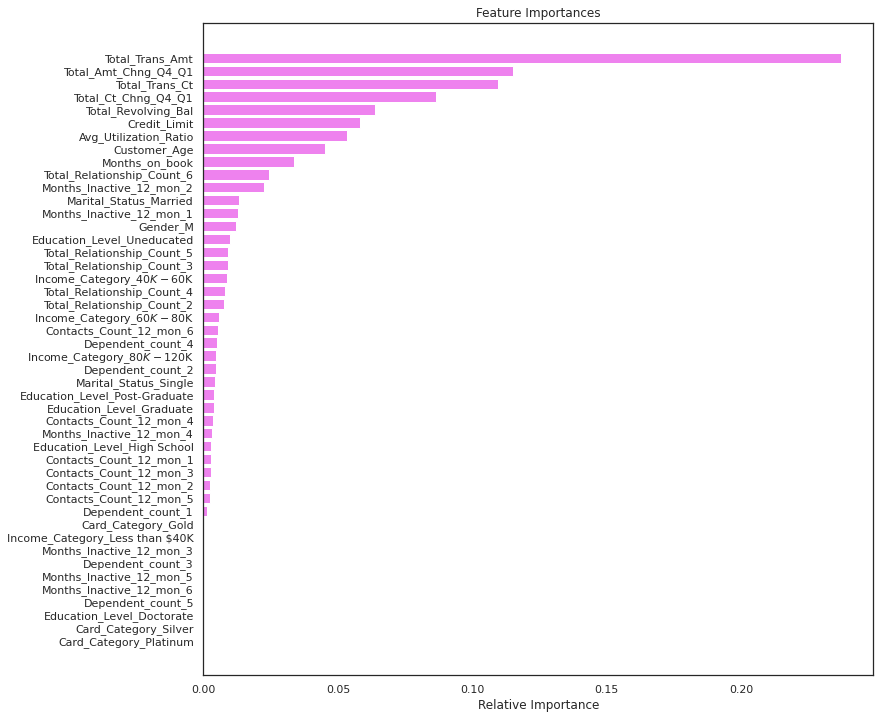

In [87]:
feature_names = X_train.columns
importances = abc_tuned_rand[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### GradientBoosting with Grid Search

In [88]:
%%time
# Creating pipeline
pipe_gb_grid = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'gradientboostingclassifier__n_estimators':[100,200],
              'gradientboostingclassifier__max_depth':[10,20],
              'gradientboostingclassifier__min_samples_leaf': [10,20],
              'gradientboostingclassifier__min_samples_split': [25,35]
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(pipe_gb_grid, param_grid, scoring=scorer,cv=5,n_jobs = -1)

# Fitting parameters in GridSeachCV
pipe_gb_grid = grid_cv.fit(X_train, y_train)


print("Best parameters are {} with CV score={}:" .format(pipe_gb_grid.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__max_depth': 20, 'gradientboostingclassifier__min_samples_leaf': 20, 'gradientboostingclassifier__min_samples_split': 25, 'gradientboostingclassifier__n_estimators': 200} with CV score=0.8595409227915605:
CPU times: user 22 s, sys: 46.5 ms, total: 22.1 s
Wall time: 5min 36s


In [89]:
# Creating new pipeline with best parameters
gb_tuned_grid = make_pipeline(
    StandardScaler(),GradientBoostingClassifier(max_depth=20,
                                            min_samples_leaf=20,
                                            min_samples_split=25,
                                            n_estimators=200, random_state=1
                                            ))

# Fit the model on training data
gb_tuned_grid.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=20, min_samples_leaf=20,
                                            min_samples_split=25,
                                            n_estimators=200,
                                            random_state=1))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          1.00000        0.97104       1.00000      0.88730   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.92918         1.00000        0.90776

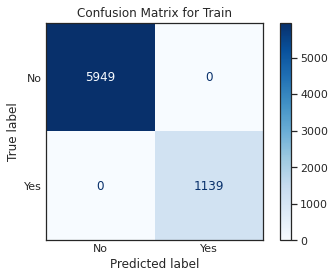

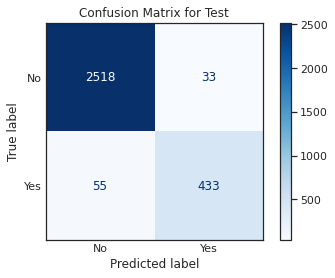

In [90]:
gb_tuned_score=get_metrics_score(gb_tuned_grid,' Gradient with Grid Search',X_train,X_test,y_train,y_test)

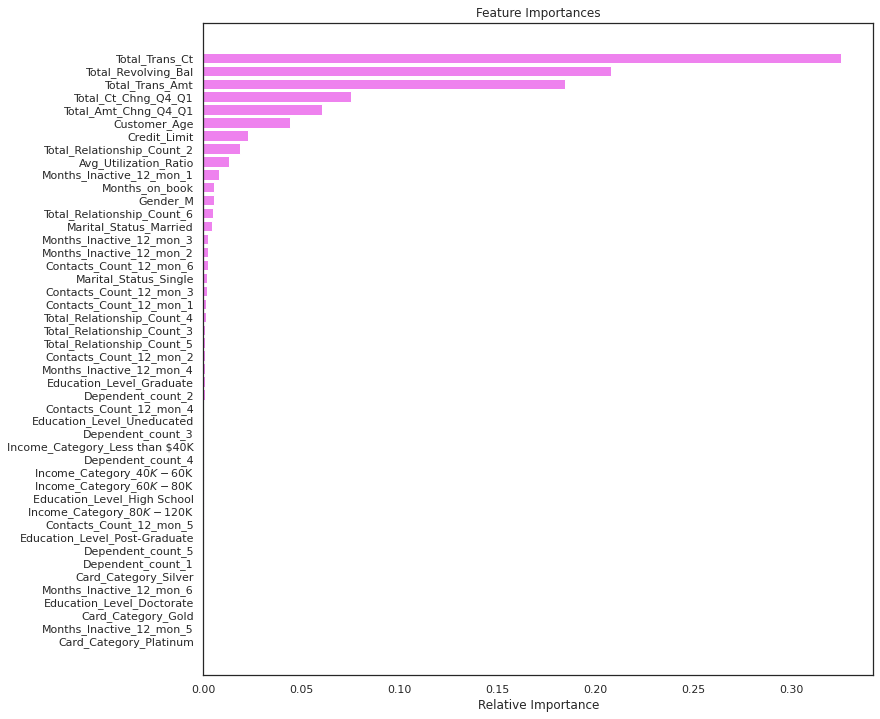

In [91]:
feature_names = X_train.columns
importances = gb_tuned_grid[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Grid search gave a better recall than cross validation. 
- Model is overfitting. Let see how randomized search perform.

### GradientBoosting with Random Search

In [92]:
%%time 
pipe_gb_rand = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

param_grid = {'gradientboostingclassifier__n_estimators':[100,200],
              'gradientboostingclassifier__max_depth':[10,20],
              'gradientboostingclassifier__min_samples_leaf': [10,20],
              'gradientboostingclassifier__min_samples_split': [25,35]
              }


scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
pipe_gb_rand = RandomizedSearchCV(estimator=pipe_gb_rand, param_distributions=param_grid,n_jobs = -1, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
pipe_gb_rand.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(pipe_gb_rand.best_params_,pipe_gb_rand.best_score_))

Best parameters are {'gradientboostingclassifier__n_estimators': 200, 'gradientboostingclassifier__min_samples_split': 25, 'gradientboostingclassifier__min_samples_leaf': 20, 'gradientboostingclassifier__max_depth': 20} with CV score=0.8595409227915605:
CPU times: user 21.8 s, sys: 46.5 ms, total: 21.8 s
Wall time: 3min 1s


In [93]:
gb_tuned_rand = make_pipeline(
    StandardScaler(),GradientBoostingClassifier(max_depth=20, min_samples_leaf=20,
                                            min_samples_split=25,
                                            n_estimators=200,
                                            random_state=1))

# Fit the model on training data
gb_tuned_rand.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=20, min_samples_leaf=20,
                                            min_samples_split=25,
                                            n_estimators=200,
                                            random_state=1))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          1.00000        0.97104       1.00000      0.88730   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           1.00000         0.92918         1.00000        0.90776

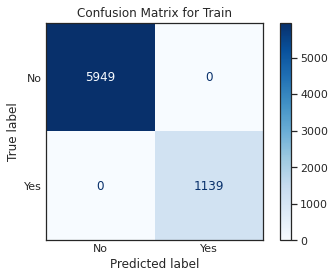

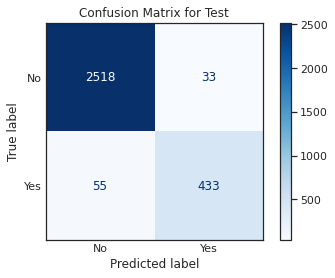

In [94]:
gb_rand_tuned_score=get_metrics_score(gb_tuned_rand,' Gradient boosting with Random Search',X_train,X_test,y_train,y_test)

- Grid search took a significantly longer time than random search. 
- Both the model perform the same , both have same recall and are overfitting

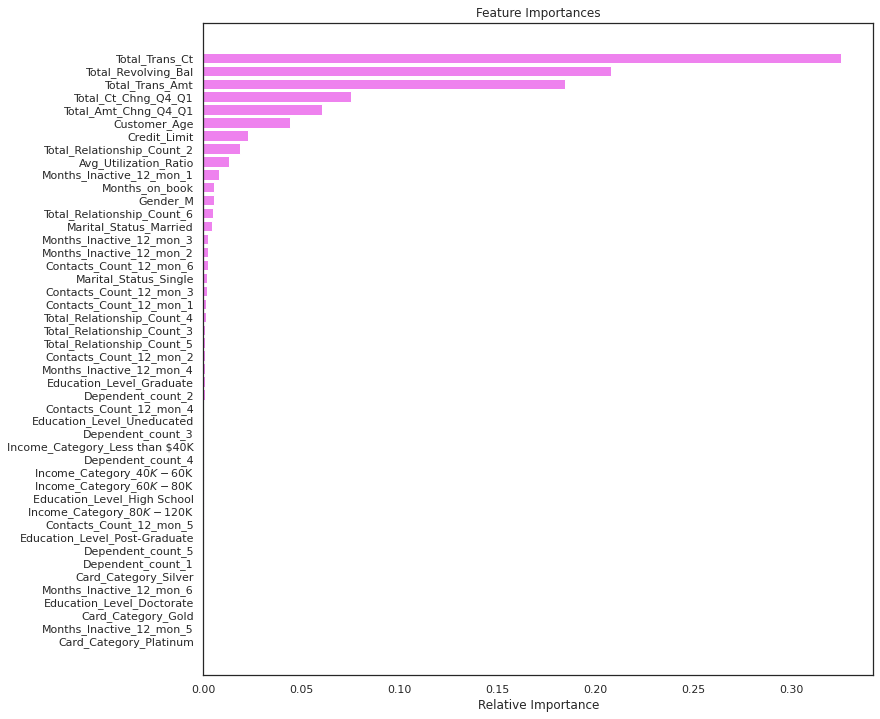

In [95]:
feature_names = X_train.columns
importances = gb_tuned_rand[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### XGBclassifier with Grid Search

In [96]:
%%time 

#Creating pipeline
#Creating pipeline
pipe_xgboost=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[2,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2], 
            'xgbclassifier__subsample':[0.7,1]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
Xgboost_grid_cv = GridSearchCV(estimator=pipe_xgboost, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
Xgboost_grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(Xgboost_grid_cv.best_params_,Xgboost_grid_cv.best_score_))

Best parameters are {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9473220496174356:
CPU times: user 7.27 s, sys: 948 ms, total: 8.22 s
Wall time: 2h 59min 45s


In [97]:
# Creating new pipeline with best parameters
xgb_tuned_grid = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=150,
        scale_pos_weight=10,
        subsample=1,
        learning_rate=0.01,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned_grid.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.93073        0.90556       0.99561      0.95697   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.70000         0.63711         0.82204        0.76495

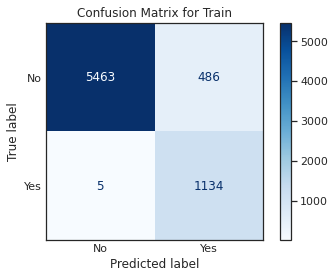

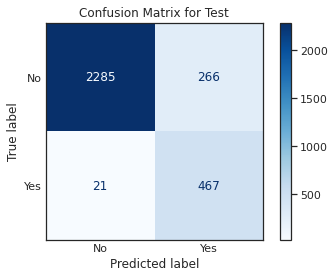

In [98]:
xgb_tuned_score_grid=get_metrics_score(xgb_tuned_grid,' XGboost with Grid Search',X_train,X_test,y_train,y_test)

- Recall has improved by ~9% using grid search and hyperparameter.

### XGboost using Random Search

In [99]:
%%time 
#Creating pipeline

pipe_xgboost_ran=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in random
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[2,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2], 
            'xgbclassifier__subsample':[0.7,1]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe_xgboost_ran, param_distributions=param_grid,n_jobs = -1, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.7, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__learning_rate': 0.01} with CV score=0.9429283561326223:
CPU times: user 2.64 s, sys: 136 ms, total: 2.77 s
Wall time: 24min 58s


In [100]:
# Creating new pipeline with best parameters
xgb_rand = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_rand.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Metric  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
Score          0.91210        0.89174       0.98946      0.95082   

Metric  Train_Precision  Test_Precision  Train_F1-Score  Test_F1-Score  
Score           0.64845         0.60338         0.78345        0.73827

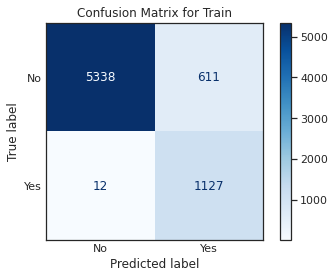

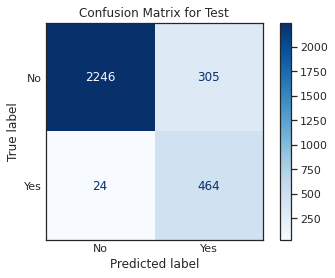

In [101]:
randomized_cv_tuned_score=get_metrics_score(randomized_cv,'XG boosting with Random Search',X_train,X_test,y_train,y_test)


- Random search took less time but recall was not better than Grid search

### Comparing all models

In [102]:
comparison_frame = pd.DataFrame({'Model':model_name,
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  \
9                                  XGboost with Grid Search         0.93073   
10                           XG boosting with Random Search         0.91210   
5                                 Adaboost with Grid Search         0.98434   
6                               Adaboost with Random Search         0.99125   
7                                 Gradient with Grid Search         1.00000   
8                      Gradient boosting with Random Search         1.00000   
3                    LogisticRegression with under sampling         0.85382   
4    LogisticRegression with Regularization on Undersampled         0.85250   
0                                        LogisticRegression         0.91196   
1                     LogisticRegression with over sampling         0.93822   
2   LogisticRegression with Regularization on Over sampling         0.94117   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
9         0.90556       0.99561      0.95697          0.70000         0.63711   
10        0.89174       0.98946      0.95082          0.64845         0.60338   
5         0.96742       0.94469      0.89549          0.95730         0.90103   
6         0.96775       0.96927      0.89344          0.97613         0.90456   
7         0.97104       1.00000      0.88730          1.00000         0.92918   
8         0.97104       1.00000      0.88730          1.00000         0.92918   
3         0.85127       0.85777      0.84836          0.85105         0.52273   
4         0.85094       0.85162      0.84836          0.85312         0.52207   
0         0.91017       0.61984      0.62500          0.78707         0.77215   
1         0.89964       0.91982      0.61475          0.95497         0.71942   
2         0.90227       0.92150      0.60656          0.95923         0.73815   

    Train_F1  Test_F1  
9    0.82204  0.76495  
10   0.78345  0.73827  
5    0.95095  0.89825  
6    0.97269  0.89897  
7    1.00000  0.90776  
8    1.00000  0.90776  
3    0.85439  0.64688  
4    0.85237  0.64637  
0    0.69352  0.69083  
1    0.93707  0.66298  
2    0.93999  0.66592

- Logistic Regression with oversampling performed very poorly on test data. The recall was only 0.48.
- The xgboost model tuned using Grid search is giving the best test recall of 0.95. The model can 93% time accuractely predict customers who will attrite.Precision is very low for this model.
- Time take by Random search was less compared to time taken by Grid search, but that doesn't necessarily mean that the performance was better .  Since not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions random search is faster. The number of parameter settings that are tried is given by n_iter. All set of hyperparameters is not searched sequentially.Random search doesn’t guarantee finding the best set of hyperparameters.Grid search did slightly better in case of XGboost and Adaboost.
- The performance can vary with range of hyperparmeters selected. With more number of hyperparemter grid search will probably take more time.
- Let's see the feature importance from the tuned xgboost model.

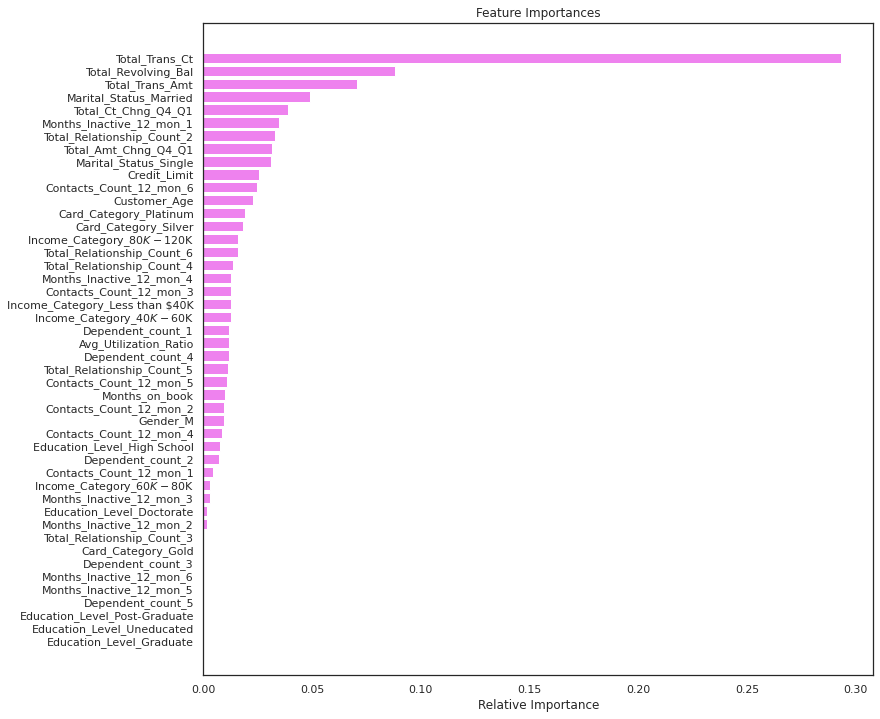

In [103]:

feature_names = X_train.columns
importances = xgb_tuned_grid[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Total Transcation count is most important features followed by Total Revolving balance and Total Transacational amount.

<a id='cn'></a>
<h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Conclusion</h2>

- Random Grid search takes less time and tries to choose best parameters , but that doesnt necessarily mean it will perform well.
- Different hyperparamters can be tried to improve some of the model.
- XGbooost with grid search performed best.
- Total Transcation count is most important features followed by Total Revolving balance and Total Transacational amount.
- Customers lower transcation , lower revolving balance , lower transcational amount are an indication that customer will attrite.

<a id='br'> </a>
<h2 style="background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    font-family:Garamond 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;">Business Recommendations & Insights</h2>


* Lower transcation count on credit card , less revolving balance , less transcational amount are an indication that customer will attrite. Lower transcation indicate customer is not using this credit card , bank should offer more rewards or cashback  or some other offers to customer to use the credit card more.
* As per the EDA if customer hold more product with the bank he/she is less likely to attrite.Bank can offer more product to  such customers so they buy  more products which will help retain such customers
* Customers who have been inactive for a month show high chances of attrition.Bank should focus on such customers as well.
* Avg utilization ratio is lower amongst attrited customers.
* As per EDA Customer in age range 36-55 ,who were doctorate or postgraduate ,or Female attrited more. One of the reasons can be some competitive bank is offering them better deals leading to lesser user of this banks credit card.
* As per the EDA Customers who have had high number of contacts with the bank in the last 12 months have attrited. This needs to be investigated whether there were any  issues of customers which were not resolved leading into customer leaving the bank.


